##### Copyright 2019 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 팬더 DataFrame 로드하기

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/tutorials/load_data/pandas_dataframe"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드하기</a></td>
</table>

이 튜토리얼에서는 <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html" class="external">pandas DataFrames</a>를 TensorFlow에 로드하는 방법의 예를 보여줍니다.

UCI Machine Learning Repository에서 제공하는 작은 <a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease" class="external">심장 질환 데이터세트</a>를 사용합니다. CSV에는 수백 개의 행이 있습니다. 각 행은 환자를 설명하고 각 열은 속성을 설명합니다. 이 정보를 사용하여 환자에게 심장병이 있는지 여부를 예측합니다. 이것은 이진 분류 작업에 해당합니다.

## pandas를 사용하여 데이터 읽기

In [2]:
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

2022-12-14 20:52:28.492546: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 20:52:28.492656: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 20:52:28.492666: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


심장 질환 데이터세트가 포함된 CSV 파일 다운로드:

In [3]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

 8192/13273 [=================>............] - ETA: 0s

13273/13273 [==============================] - 0s 0us/step


팬더를 사용하여 CSV 파일 읽기:

In [4]:
df = pd.read_csv(csv_file)

데이터는 다음과 같습니다.

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

`target` 열에 포함된 레이블을 예측하는 모델을 빌드합니다.

In [7]:
target = df.pop('target')

## 배열로서의 DataFrame

데이터에 균일한 데이터 유형 또는 `dtype`이 있는 경우 NumPy 배열을 사용할 수 있는 모든 곳에서 pandas DataFrame을 사용할 수 있습니다. 이렇게 될 수 있는 이유는 `pandas.DataFrame` 클래스가 `__array__` 프로토콜을 지원하고 TensorFlow의 `tf.convert_to_tensor` 함수가 이 프로토콜을 지원하는 객체를 허용하기 때문입니다.

데이터세트에서 숫자 특성을 가져옵니다(지금은 범주형 특성을 건너뜀).

In [8]:
numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


DataFrame은 `DataFrame.values` 속성 또는 `numpy.array(df)`를 사용하여 NumPy 배열로 변환할 수 있습니다. 텐서로 변환하려면 `tf.convert_to_tensor`를 사용하세요.

In [9]:
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

일반적으로 `tf.convert_to_tensor`를 사용하여 객체를 텐서로 변환할 수 있는 경우 `tf.Tensor`를 전달할 수 있는 곳이면 어디든지 이를 전달할 수 있습니다.

### Model.fit과 함께 사용하기

단일 텐서로 해석되는 DataFrame은 `Model.fit` 메서드에 대한 인수로 직접 사용할 수 있습니다.

다음은 데이터세트의 수치적 특성에 대한 모델 훈련의 예입니다.

첫 단계는 입력 범위를 정규화하는 것입니다. 이를 위해 `tf.keras.layers.Normalization` 레이어를 사용합니다.

레이어를 실행하기 전에 해당 평균과 표준편차를 설정하려면 `Normalization.adapt` 메서드를 호출해야 합니다.

In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

DataFrame의 처음 세 행에서 레이어를 호출하여 이 레이어의 출력 예를 시각화합니다.

In [11]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93383914,  0.03480718,  0.74578077, -0.26008663,  1.0680453 ],
       [ 1.3782105 , -1.7806165 ,  1.5923285 ,  0.7573877 ,  0.38022864],
       [ 1.3782105 , -0.87290466, -0.6651321 , -0.33687714,  1.3259765 ]],
      dtype=float32)>

정규화 레이어를 단순 모델의 첫 번째 레이어로 사용합니다.

In [12]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

DataFrame을 `Model.fit`에 `x` 인수로 전달하면 Keras는 DataFrame을 NumPy 배열인 것처럼 취급합니다.

In [13]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15


  1/152 [..............................] - ETA: 4:10 - loss: 0.7045 - accuracy: 0.5000

 19/152 [==>...........................] - ETA: 0s - loss: 0.6487 - accuracy: 0.6579  

 37/152 [======>.......................] - ETA: 0s - loss: 0.6372 - accuracy: 0.6757

 56/152 [==========>...................] - ETA: 0s - loss: 0.6322 - accuracy: 0.6696

 75/152 [=============>................] - ETA: 0s - loss: 0.6155 - accuracy: 0.6933

 94/152 [=================>............] - ETA: 0s - loss: 0.6063 - accuracy: 0.7074

113/152 [=====================>........] - ETA: 0s - loss: 0.5861 - accuracy: 0.7257

132/152 [=========================>....] - ETA: 0s - loss: 0.5763 - accuracy: 0.7273

151/152 [============================>.] - ETA: 0s - loss: 0.5785 - accuracy: 0.7252

152/152 [==============================] - 2s 3ms/step - loss: 0.5785 - accuracy: 0.7261


Epoch 2/15


  1/152 [..............................] - ETA: 0s - loss: 0.4086 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4878 - accuracy: 0.7500

 39/152 [======>.......................] - ETA: 0s - loss: 0.5363 - accuracy: 0.7308

 58/152 [==========>...................] - ETA: 0s - loss: 0.5355 - accuracy: 0.7241

 77/152 [==============>...............] - ETA: 0s - loss: 0.5293 - accuracy: 0.7273

 96/152 [=================>............] - ETA: 0s - loss: 0.5373 - accuracy: 0.7083

116/152 [=====================>........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7026

135/152 [=========================>....] - ETA: 0s - loss: 0.5262 - accuracy: 0.7148

152/152 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.7261


Epoch 3/15


  1/152 [..............................] - ETA: 0s - loss: 0.7512 - accuracy: 0.5000

 19/152 [==>...........................] - ETA: 0s - loss: 0.4361 - accuracy: 0.7632

 38/152 [======>.......................] - ETA: 0s - loss: 0.4645 - accuracy: 0.7368

 57/152 [==========>...................] - ETA: 0s - loss: 0.4865 - accuracy: 0.7281

 76/152 [==============>...............] - ETA: 0s - loss: 0.4883 - accuracy: 0.7303

 95/152 [=================>............] - ETA: 0s - loss: 0.4810 - accuracy: 0.7421

114/152 [=====================>........] - ETA: 0s - loss: 0.4929 - accuracy: 0.7237

133/152 [=========================>....] - ETA: 0s - loss: 0.4936 - accuracy: 0.7218

152/152 [==============================] - ETA: 0s - loss: 0.4899 - accuracy: 0.7261

152/152 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7261


Epoch 4/15


  1/152 [..............................] - ETA: 0s - loss: 0.9754 - accuracy: 0.0000e+00

 20/152 [==>...........................] - ETA: 0s - loss: 0.5836 - accuracy: 0.6500    

 39/152 [======>.......................] - ETA: 0s - loss: 0.4850 - accuracy: 0.7179

 58/152 [==========>...................] - ETA: 0s - loss: 0.4856 - accuracy: 0.6983

 77/152 [==============>...............] - ETA: 0s - loss: 0.4823 - accuracy: 0.7208

 96/152 [=================>............] - ETA: 0s - loss: 0.4841 - accuracy: 0.7188

115/152 [=====================>........] - ETA: 0s - loss: 0.4804 - accuracy: 0.7217

134/152 [=========================>....] - ETA: 0s - loss: 0.4907 - accuracy: 0.7239

152/152 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7360


Epoch 5/15


  1/152 [..............................] - ETA: 0s - loss: 1.0053 - accuracy: 0.0000e+00

 20/152 [==>...........................] - ETA: 0s - loss: 0.6706 - accuracy: 0.5250    

 39/152 [======>.......................] - ETA: 0s - loss: 0.5624 - accuracy: 0.6410

 58/152 [==========>...................] - ETA: 0s - loss: 0.5214 - accuracy: 0.6897

 77/152 [==============>...............] - ETA: 0s - loss: 0.4927 - accuracy: 0.7143

 96/152 [=================>............] - ETA: 0s - loss: 0.4733 - accuracy: 0.7396

115/152 [=====================>........] - ETA: 0s - loss: 0.4652 - accuracy: 0.7478

134/152 [=========================>....] - ETA: 0s - loss: 0.4547 - accuracy: 0.7537

152/152 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7558


Epoch 6/15


  1/152 [..............................] - ETA: 0s - loss: 1.0219 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.6750

 39/152 [======>.......................] - ETA: 0s - loss: 0.4290 - accuracy: 0.7564

 58/152 [==========>...................] - ETA: 0s - loss: 0.4371 - accuracy: 0.7759

 77/152 [==============>...............] - ETA: 0s - loss: 0.4561 - accuracy: 0.7662

 96/152 [=================>............] - ETA: 0s - loss: 0.4406 - accuracy: 0.7708

116/152 [=====================>........] - ETA: 0s - loss: 0.4400 - accuracy: 0.7716

135/152 [=========================>....] - ETA: 0s - loss: 0.4528 - accuracy: 0.7630

152/152 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.7657


Epoch 7/15


  1/152 [..............................] - ETA: 0s - loss: 0.3338 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4647 - accuracy: 0.7750

 39/152 [======>.......................] - ETA: 0s - loss: 0.4762 - accuracy: 0.7308

 59/152 [==========>...................] - ETA: 0s - loss: 0.4699 - accuracy: 0.7458

 78/152 [==============>...............] - ETA: 0s - loss: 0.4546 - accuracy: 0.7500

 98/152 [==================>...........] - ETA: 0s - loss: 0.4498 - accuracy: 0.7449

118/152 [======================>.......] - ETA: 0s - loss: 0.4500 - accuracy: 0.7500

137/152 [==========================>...] - ETA: 0s - loss: 0.4496 - accuracy: 0.7591

152/152 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.7624


Epoch 8/15


  1/152 [..............................] - ETA: 0s - loss: 1.5176 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.3785 - accuracy: 0.7750

 39/152 [======>.......................] - ETA: 0s - loss: 0.4265 - accuracy: 0.7821

 58/152 [==========>...................] - ETA: 0s - loss: 0.4545 - accuracy: 0.7759

 77/152 [==============>...............] - ETA: 0s - loss: 0.4552 - accuracy: 0.7727

 96/152 [=================>............] - ETA: 0s - loss: 0.4334 - accuracy: 0.7865

115/152 [=====================>........] - ETA: 0s - loss: 0.4222 - accuracy: 0.7783

134/152 [=========================>....] - ETA: 0s - loss: 0.4624 - accuracy: 0.7612

152/152 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7789


Epoch 9/15


  1/152 [..............................] - ETA: 0s - loss: 0.4290 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4262 - accuracy: 0.8000

 39/152 [======>.......................] - ETA: 0s - loss: 0.4258 - accuracy: 0.7564

 58/152 [==========>...................] - ETA: 0s - loss: 0.4370 - accuracy: 0.7845

 76/152 [==============>...............] - ETA: 0s - loss: 0.4447 - accuracy: 0.7632

 95/152 [=================>............] - ETA: 0s - loss: 0.4473 - accuracy: 0.7526

114/152 [=====================>........] - ETA: 0s - loss: 0.4476 - accuracy: 0.7544

133/152 [=========================>....] - ETA: 0s - loss: 0.4363 - accuracy: 0.7707

152/152 [==============================] - ETA: 0s - loss: 0.4380 - accuracy: 0.7822

152/152 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.7822


Epoch 10/15


  1/152 [..............................] - ETA: 0s - loss: 0.4376 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4837 - accuracy: 0.7500

 40/152 [======>.......................] - ETA: 0s - loss: 0.4231 - accuracy: 0.7875

 59/152 [==========>...................] - ETA: 0s - loss: 0.4182 - accuracy: 0.7881

 78/152 [==============>...............] - ETA: 0s - loss: 0.4184 - accuracy: 0.7821

 97/152 [==================>...........] - ETA: 0s - loss: 0.4099 - accuracy: 0.7887

116/152 [=====================>........] - ETA: 0s - loss: 0.4160 - accuracy: 0.7931

135/152 [=========================>....] - ETA: 0s - loss: 0.4149 - accuracy: 0.7926

152/152 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.7822


Epoch 11/15


  1/152 [..............................] - ETA: 0s - loss: 0.0088 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.8000

 40/152 [======>.......................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8625

 59/152 [==========>...................] - ETA: 0s - loss: 0.3933 - accuracy: 0.8220

 78/152 [==============>...............] - ETA: 0s - loss: 0.4058 - accuracy: 0.8205

 97/152 [==================>...........] - ETA: 0s - loss: 0.3946 - accuracy: 0.8247

116/152 [=====================>........] - ETA: 0s - loss: 0.3962 - accuracy: 0.7974

135/152 [=========================>....] - ETA: 0s - loss: 0.4194 - accuracy: 0.7889

152/152 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7855


Epoch 12/15


  1/152 [..............................] - ETA: 0s - loss: 0.2200 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8750

 39/152 [======>.......................] - ETA: 0s - loss: 0.3768 - accuracy: 0.8205

 58/152 [==========>...................] - ETA: 0s - loss: 0.4320 - accuracy: 0.7845

 77/152 [==============>...............] - ETA: 0s - loss: 0.4238 - accuracy: 0.7727

 96/152 [=================>............] - ETA: 0s - loss: 0.4308 - accuracy: 0.7812

115/152 [=====================>........] - ETA: 0s - loss: 0.4453 - accuracy: 0.7739

134/152 [=========================>....] - ETA: 0s - loss: 0.4295 - accuracy: 0.7873

152/152 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7822


Epoch 13/15


  1/152 [..............................] - ETA: 0s - loss: 0.5697 - accuracy: 1.0000

 21/152 [===>..........................] - ETA: 0s - loss: 0.4663 - accuracy: 0.7619

 41/152 [=======>......................] - ETA: 0s - loss: 0.4777 - accuracy: 0.7805

 60/152 [==========>...................] - ETA: 0s - loss: 0.4600 - accuracy: 0.7833

 79/152 [==============>...............] - ETA: 0s - loss: 0.4447 - accuracy: 0.7911

 98/152 [==================>...........] - ETA: 0s - loss: 0.4225 - accuracy: 0.8112

117/152 [======================>.......] - ETA: 0s - loss: 0.4109 - accuracy: 0.8120

136/152 [=========================>....] - ETA: 0s - loss: 0.4275 - accuracy: 0.7978

152/152 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.7888


Epoch 14/15


  1/152 [..............................] - ETA: 0s - loss: 1.2066 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4091 - accuracy: 0.7750

 39/152 [======>.......................] - ETA: 0s - loss: 0.4078 - accuracy: 0.7564

 58/152 [==========>...................] - ETA: 0s - loss: 0.4006 - accuracy: 0.7759

 77/152 [==============>...............] - ETA: 0s - loss: 0.4183 - accuracy: 0.7532

 96/152 [=================>............] - ETA: 0s - loss: 0.4660 - accuracy: 0.7552

115/152 [=====================>........] - ETA: 0s - loss: 0.4461 - accuracy: 0.7739

134/152 [=========================>....] - ETA: 0s - loss: 0.4362 - accuracy: 0.7873

152/152 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.7822


Epoch 15/15


  1/152 [..............................] - ETA: 0s - loss: 0.6814 - accuracy: 0.5000

 19/152 [==>...........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.7368

 37/152 [======>.......................] - ETA: 0s - loss: 0.5222 - accuracy: 0.8108

 56/152 [==========>...................] - ETA: 0s - loss: 0.5014 - accuracy: 0.7857

 75/152 [=============>................] - ETA: 0s - loss: 0.4519 - accuracy: 0.7800

 94/152 [=================>............] - ETA: 0s - loss: 0.4332 - accuracy: 0.7872

113/152 [=====================>........] - ETA: 0s - loss: 0.4281 - accuracy: 0.7920

132/152 [=========================>....] - ETA: 0s - loss: 0.4210 - accuracy: 0.7917

151/152 [============================>.] - ETA: 0s - loss: 0.4261 - accuracy: 0.7914

152/152 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.7921


### tf.data와 함께 사용하기

`tf.data` 변환을 균일한 `dtype`의 DataFrame에 적용하려는 경우 `Dataset.from_tensor_slices` 메서드는 DataFrame의 행을 반복하는 데이터세트를 생성합니다. 각 행은 처음에 값으로 구성된 벡터입니다. 모델을 훈련시키려면 `(inputs, labels)` 쌍이 필요하므로 `(features, labels)`을 전달하면 `Dataset.from_tensor_slices`가 필요한 슬라이스 쌍을 반환합니다.

In [14]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

for row in numeric_dataset.take(3):
  print(row)

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 63. , 150. , 145. , 233. ,   2.3])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 108. , 160. , 286. ,   1.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 129. , 120. , 229. ,   2.6])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [15]:
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

model = get_basic_model()
model.fit(numeric_batches, epochs=15)

Epoch 1/15


  1/152 [..............................] - ETA: 2:41 - loss: 0.5778 - accuracy: 1.0000

 19/152 [==>...........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.8421  

 38/152 [======>.......................] - ETA: 0s - loss: 0.6001 - accuracy: 0.7237

 58/152 [==========>...................] - ETA: 0s - loss: 0.6158 - accuracy: 0.6897

 77/152 [==============>...............] - ETA: 0s - loss: 0.6081 - accuracy: 0.7078

 96/152 [=================>............] - ETA: 0s - loss: 0.5895 - accuracy: 0.7188

116/152 [=====================>........] - ETA: 0s - loss: 0.5826 - accuracy: 0.7112

134/152 [=========================>....] - ETA: 0s - loss: 0.5749 - accuracy: 0.7201

152/152 [==============================] - ETA: 0s - loss: 0.5687 - accuracy: 0.7261

152/152 [==============================] - 1s 3ms/step - loss: 0.5687 - accuracy: 0.7261


Epoch 2/15


  1/152 [..............................] - ETA: 0s - loss: 1.5996 - accuracy: 0.0000e+00

 21/152 [===>..........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7619    

 41/152 [=======>......................] - ETA: 0s - loss: 0.5127 - accuracy: 0.7439

 61/152 [===========>..................] - ETA: 0s - loss: 0.4868 - accuracy: 0.7623

 81/152 [==============>...............] - ETA: 0s - loss: 0.4689 - accuracy: 0.7716

101/152 [==================>...........] - ETA: 0s - loss: 0.5003 - accuracy: 0.7525

120/152 [======================>.......] - ETA: 0s - loss: 0.5071 - accuracy: 0.7417

140/152 [==========================>...] - ETA: 0s - loss: 0.5025 - accuracy: 0.7464

152/152 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7261


Epoch 3/15


  1/152 [..............................] - ETA: 0s - loss: 0.4834 - accuracy: 1.0000

 21/152 [===>..........................] - ETA: 0s - loss: 0.4484 - accuracy: 0.7619

 40/152 [======>.......................] - ETA: 0s - loss: 0.4743 - accuracy: 0.7500

 59/152 [==========>...................] - ETA: 0s - loss: 0.5072 - accuracy: 0.7034

 79/152 [==============>...............] - ETA: 0s - loss: 0.5269 - accuracy: 0.7025

 98/152 [==================>...........] - ETA: 0s - loss: 0.5096 - accuracy: 0.7041

118/152 [======================>.......] - ETA: 0s - loss: 0.4883 - accuracy: 0.7331

137/152 [==========================>...] - ETA: 0s - loss: 0.4865 - accuracy: 0.7372

152/152 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7294


Epoch 4/15


  1/152 [..............................] - ETA: 0s - loss: 0.3604 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.5601 - accuracy: 0.6750

 39/152 [======>.......................] - ETA: 0s - loss: 0.5227 - accuracy: 0.6795

 58/152 [==========>...................] - ETA: 0s - loss: 0.4958 - accuracy: 0.7069

 77/152 [==============>...............] - ETA: 0s - loss: 0.5000 - accuracy: 0.7143

 96/152 [=================>............] - ETA: 0s - loss: 0.4976 - accuracy: 0.7135

116/152 [=====================>........] - ETA: 0s - loss: 0.4772 - accuracy: 0.7284

136/152 [=========================>....] - ETA: 0s - loss: 0.4799 - accuracy: 0.7243

152/152 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7360


Epoch 5/15


  1/152 [..............................] - ETA: 0s - loss: 0.6085 - accuracy: 0.0000e+00

 20/152 [==>...........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.6500    

 39/152 [======>.......................] - ETA: 0s - loss: 0.4382 - accuracy: 0.6923

 59/152 [==========>...................] - ETA: 0s - loss: 0.4232 - accuracy: 0.7458

 78/152 [==============>...............] - ETA: 0s - loss: 0.4669 - accuracy: 0.7244

 97/152 [==================>...........] - ETA: 0s - loss: 0.4857 - accuracy: 0.7165

117/152 [======================>.......] - ETA: 0s - loss: 0.4909 - accuracy: 0.7137

136/152 [=========================>....] - ETA: 0s - loss: 0.4699 - accuracy: 0.7279

152/152 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7327


Epoch 6/15


  1/152 [..............................] - ETA: 0s - loss: 0.4226 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4444 - accuracy: 0.7250

 40/152 [======>.......................] - ETA: 0s - loss: 0.4078 - accuracy: 0.7125

 60/152 [==========>...................] - ETA: 0s - loss: 0.4099 - accuracy: 0.7250

 79/152 [==============>...............] - ETA: 0s - loss: 0.3919 - accuracy: 0.7468

 98/152 [==================>...........] - ETA: 0s - loss: 0.4103 - accuracy: 0.7602

117/152 [======================>.......] - ETA: 0s - loss: 0.4324 - accuracy: 0.7479

137/152 [==========================>...] - ETA: 0s - loss: 0.4408 - accuracy: 0.7482

152/152 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.7426


Epoch 7/15


  1/152 [..............................] - ETA: 0s - loss: 0.2694 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.7500

 39/152 [======>.......................] - ETA: 0s - loss: 0.4189 - accuracy: 0.7436

 58/152 [==========>...................] - ETA: 0s - loss: 0.4157 - accuracy: 0.7672

 77/152 [==============>...............] - ETA: 0s - loss: 0.3986 - accuracy: 0.7922

 96/152 [=================>............] - ETA: 0s - loss: 0.4139 - accuracy: 0.7760

115/152 [=====================>........] - ETA: 0s - loss: 0.4429 - accuracy: 0.7522

134/152 [=========================>....] - ETA: 0s - loss: 0.4521 - accuracy: 0.7500

152/152 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.7459


Epoch 8/15


  1/152 [..............................] - ETA: 0s - loss: 0.0791 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4895 - accuracy: 0.6750

 39/152 [======>.......................] - ETA: 0s - loss: 0.4762 - accuracy: 0.7564

 58/152 [==========>...................] - ETA: 0s - loss: 0.4562 - accuracy: 0.7328

 78/152 [==============>...............] - ETA: 0s - loss: 0.4375 - accuracy: 0.7372

 98/152 [==================>...........] - ETA: 0s - loss: 0.4660 - accuracy: 0.7449

118/152 [======================>.......] - ETA: 0s - loss: 0.4716 - accuracy: 0.7331

138/152 [==========================>...] - ETA: 0s - loss: 0.4591 - accuracy: 0.7500

152/152 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.7591


Epoch 9/15


  1/152 [..............................] - ETA: 0s - loss: 0.4891 - accuracy: 0.5000

 21/152 [===>..........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.7381

 40/152 [======>.......................] - ETA: 0s - loss: 0.4134 - accuracy: 0.7750

 60/152 [==========>...................] - ETA: 0s - loss: 0.4106 - accuracy: 0.7917

 80/152 [==============>...............] - ETA: 0s - loss: 0.4538 - accuracy: 0.7625

 99/152 [==================>...........] - ETA: 0s - loss: 0.4374 - accuracy: 0.7727

118/152 [======================>.......] - ETA: 0s - loss: 0.4369 - accuracy: 0.7627

137/152 [==========================>...] - ETA: 0s - loss: 0.4370 - accuracy: 0.7591

152/152 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.7591


Epoch 10/15


  1/152 [..............................] - ETA: 0s - loss: 0.3461 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.5018 - accuracy: 0.7500

 40/152 [======>.......................] - ETA: 0s - loss: 0.4653 - accuracy: 0.7750

 60/152 [==========>...................] - ETA: 0s - loss: 0.4540 - accuracy: 0.7750

 80/152 [==============>...............] - ETA: 0s - loss: 0.4230 - accuracy: 0.7812

100/152 [==================>...........] - ETA: 0s - loss: 0.4366 - accuracy: 0.7750

120/152 [======================>.......] - ETA: 0s - loss: 0.4520 - accuracy: 0.7708

140/152 [==========================>...] - ETA: 0s - loss: 0.4402 - accuracy: 0.7821

152/152 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.7756


Epoch 11/15


  1/152 [..............................] - ETA: 0s - loss: 0.2994 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.6248 - accuracy: 0.7000

 40/152 [======>.......................] - ETA: 0s - loss: 0.5365 - accuracy: 0.7125

 60/152 [==========>...................] - ETA: 0s - loss: 0.4918 - accuracy: 0.7417

 80/152 [==============>...............] - ETA: 0s - loss: 0.4703 - accuracy: 0.7625

100/152 [==================>...........] - ETA: 0s - loss: 0.4573 - accuracy: 0.7650

120/152 [======================>.......] - ETA: 0s - loss: 0.4459 - accuracy: 0.7708

140/152 [==========================>...] - ETA: 0s - loss: 0.4468 - accuracy: 0.7750

152/152 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.7789


Epoch 12/15


  1/152 [..............................] - ETA: 0s - loss: 0.5924 - accuracy: 0.5000

 21/152 [===>..........................] - ETA: 0s - loss: 0.4312 - accuracy: 0.7619

 41/152 [=======>......................] - ETA: 0s - loss: 0.4114 - accuracy: 0.8171

 61/152 [===========>..................] - ETA: 0s - loss: 0.3902 - accuracy: 0.8115

 81/152 [==============>...............] - ETA: 0s - loss: 0.4407 - accuracy: 0.7840

100/152 [==================>...........] - ETA: 0s - loss: 0.4285 - accuracy: 0.7900

120/152 [======================>.......] - ETA: 0s - loss: 0.4232 - accuracy: 0.7875

140/152 [==========================>...] - ETA: 0s - loss: 0.4189 - accuracy: 0.7929

152/152 [==============================] - 0s 3ms/step - loss: 0.4344 - accuracy: 0.7822


Epoch 13/15


  1/152 [..............................] - ETA: 0s - loss: 0.0446 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4426 - accuracy: 0.8250

 39/152 [======>.......................] - ETA: 0s - loss: 0.4353 - accuracy: 0.8205

 59/152 [==========>...................] - ETA: 0s - loss: 0.4244 - accuracy: 0.8136

 79/152 [==============>...............] - ETA: 0s - loss: 0.4177 - accuracy: 0.8291

 98/152 [==================>...........] - ETA: 0s - loss: 0.4122 - accuracy: 0.8163

118/152 [======================>.......] - ETA: 0s - loss: 0.4337 - accuracy: 0.7966

137/152 [==========================>...] - ETA: 0s - loss: 0.4415 - accuracy: 0.7774

152/152 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.7855


Epoch 14/15


  1/152 [..............................] - ETA: 0s - loss: 1.4755 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4890 - accuracy: 0.7000

 39/152 [======>.......................] - ETA: 0s - loss: 0.4041 - accuracy: 0.7949

 59/152 [==========>...................] - ETA: 0s - loss: 0.3885 - accuracy: 0.8220

 78/152 [==============>...............] - ETA: 0s - loss: 0.3707 - accuracy: 0.8269

 97/152 [==================>...........] - ETA: 0s - loss: 0.3977 - accuracy: 0.8144

117/152 [======================>.......] - ETA: 0s - loss: 0.4150 - accuracy: 0.7991

136/152 [=========================>....] - ETA: 0s - loss: 0.4365 - accuracy: 0.7757

152/152 [==============================] - 0s 3ms/step - loss: 0.4284 - accuracy: 0.7822


Epoch 15/15


  1/152 [..............................] - ETA: 0s - loss: 0.8215 - accuracy: 0.5000

 19/152 [==>...........................] - ETA: 0s - loss: 0.5017 - accuracy: 0.8158

 39/152 [======>.......................] - ETA: 0s - loss: 0.4538 - accuracy: 0.8205

 59/152 [==========>...................] - ETA: 0s - loss: 0.4246 - accuracy: 0.7881

 79/152 [==============>...............] - ETA: 0s - loss: 0.4117 - accuracy: 0.7975

 99/152 [==================>...........] - ETA: 0s - loss: 0.4151 - accuracy: 0.7828

119/152 [======================>.......] - ETA: 0s - loss: 0.4303 - accuracy: 0.7731

138/152 [==========================>...] - ETA: 0s - loss: 0.4239 - accuracy: 0.7862

152/152 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7822


## DataFrame을 사전으로 사용

이기종 데이터를 다루기 시작하면 DataFrame을 더 이상 단일 배열인 것처럼 취급할 수 없습니다. TensorFlow 텐서는 모든 요소의 `dtype`이 같을 것을 요구합니다.

따라서 이 경우, 이를 각 열에 균일한 `dtype`이 있는 열 사전으로 취급해야 합니다. DataFrame은 배열 사전과 매우 유사하므로 일반적으로 DataFrame을 Python dict로 캐스팅하기만 하면 됩니다. 많은 중요한 TensorFlow API가 배열의 (중첩) 사전을 입력으로 지원합니다.

`tf.data` 입력 파이프라인은 이것을 아주 잘 처리합니다. 모든 `tf.data` 연산이 사전과 튜플을 자동으로 처리합니다. 따라서 DataFrame에서 사전-예제의 데이터세트를 만들려면 `Dataset.from_tensor_slices`로 슬라이싱하기 전에 dict로 캐스팅하면 됩니다.

In [16]:
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))

다음은 해당 데이터세트의 처음 세 가지 예입니다.

In [17]:
for row in numeric_dict_ds.take(3):
  print(row)

({'age': <tf.Tensor: shape=(), dtype=int64, numpy=63>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=150>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=145>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=233>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.3>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=108>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=160>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=286>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=1.5>}, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=129>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=120>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=229>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.6>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


### Keras를 사용한 사전

일반적으로 Keras 모델과 레이어는 단일 입력 텐서를 기대하지만 이러한 클래스는 사전, 튜플 및 텐서의 중첩 구조를 허용하고 반환할 수 있습니다. 이러한 구조를 "중첩"이라고 합니다(자세한 내용은 `tf.nest` 모듈 참조).

사전을 입력으로 받아들이는 Keras 모델을 작성할 수 있는 동등한 효과의 두 가지 방법이 있습니다.

#### 1. 모델-서브 클래스 스타일

`tf.keras.Model`(또는 `tf.keras.Layer`)의 서브 클래스를 작성합니다. 입력을 직접 처리하고 출력을 생성합니다.

In [18]:
  def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
      values.append(tf.cast(inputs[key], tf.float32))

    return fun(values, axis=-1)

In [19]:
#@title
class MyModel(tf.keras.Model):
  def __init__(self):
    # Create all the internal layers in init.
    super().__init__(self)

    self.normalizer = tf.keras.layers.Normalization(axis=-1)

    self.seq = tf.keras.Sequential([
      self.normalizer,
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

  def adapt(self, inputs):
    # Stack the inputs and `adapt` the normalization layer.
    inputs = stack_dict(inputs)
    self.normalizer.adapt(inputs)

  def call(self, inputs):
    # Stack the inputs
    inputs = stack_dict(inputs)
    # Run them through all the layers.
    result = self.seq(inputs)

    return result

model = MyModel()

model.adapt(dict(numeric_features))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

이 모델은 학습을 위해 열 사전 또는 사전-요소의 데이터세트를 허용할 수 있습니다.

In [20]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5


  1/152 [..............................] - ETA: 1:55 - loss: 0.7522 - accuracy: 1.0000

  3/152 [..............................] - ETA: 3s - loss: 0.5488 - accuracy: 0.8333  

  5/152 [..............................] - ETA: 3s - loss: 0.5972 - accuracy: 0.6000

  7/152 [>.............................] - ETA: 3s - loss: 0.6729 - accuracy: 0.5714

  9/152 [>.............................] - ETA: 3s - loss: 0.6846 - accuracy: 0.5556

 11/152 [=>............................] - ETA: 3s - loss: 0.6288 - accuracy: 0.5909

 13/152 [=>............................] - ETA: 3s - loss: 0.6117 - accuracy: 0.6154

 15/152 [=>............................] - ETA: 3s - loss: 0.6278 - accuracy: 0.5333

 18/152 [==>...........................] - ETA: 3s - loss: 0.6257 - accuracy: 0.5833

 20/152 [==>...........................] - ETA: 3s - loss: 0.6241 - accuracy: 0.6250

 22/152 [===>..........................] - ETA: 3s - loss: 0.6281 - accuracy: 0.6591

 24/152 [===>..........................] - ETA: 3s - loss: 0.6291 - accuracy: 0.6458

 26/152 [====>.........................] - ETA: 3s - loss: 0.6340 - accuracy: 0.6154

 28/152 [====>.........................] - ETA: 3s - loss: 0.6134 - accuracy: 0.6429

 30/152 [====>.........................] - ETA: 3s - loss: 0.6090 - accuracy: 0.6667

 32/152 [=====>........................] - ETA: 3s - loss: 0.6105 - accuracy: 0.6875

 34/152 [=====>........................] - ETA: 3s - loss: 0.6154 - accuracy: 0.6912

 36/152 [======>.......................] - ETA: 3s - loss: 0.6076 - accuracy: 0.6944

 38/152 [======>.......................] - ETA: 2s - loss: 0.6121 - accuracy: 0.6842

 40/152 [======>.......................] - ETA: 2s - loss: 0.6056 - accuracy: 0.7000

 42/152 [=======>......................] - ETA: 2s - loss: 0.5997 - accuracy: 0.6905

 44/152 [=======>......................] - ETA: 2s - loss: 0.5980 - accuracy: 0.7045

 47/152 [========>.....................] - ETA: 2s - loss: 0.5927 - accuracy: 0.7021

 49/152 [========>.....................] - ETA: 2s - loss: 0.5896 - accuracy: 0.7041

 51/152 [=========>....................] - ETA: 2s - loss: 0.6000 - accuracy: 0.6863

 53/152 [=========>....................] - ETA: 2s - loss: 0.6023 - accuracy: 0.6887

 55/152 [=========>....................] - ETA: 2s - loss: 0.6066 - accuracy: 0.6636

 57/152 [==========>...................] - ETA: 2s - loss: 0.6035 - accuracy: 0.6579

 59/152 [==========>...................] - ETA: 2s - loss: 0.6031 - accuracy: 0.6610

 61/152 [===========>..................] - ETA: 2s - loss: 0.6081 - accuracy: 0.6557

 63/152 [===========>..................] - ETA: 2s - loss: 0.6097 - accuracy: 0.6508

 65/152 [===========>..................] - ETA: 2s - loss: 0.6202 - accuracy: 0.6462

 67/152 [============>.................] - ETA: 2s - loss: 0.6193 - accuracy: 0.6343

 69/152 [============>.................] - ETA: 2s - loss: 0.6173 - accuracy: 0.6377

 71/152 [=============>................] - ETA: 2s - loss: 0.6156 - accuracy: 0.6479

 73/152 [=============>................] - ETA: 2s - loss: 0.6183 - accuracy: 0.6370

 75/152 [=============>................] - ETA: 2s - loss: 0.6168 - accuracy: 0.6400

 77/152 [==============>...............] - ETA: 1s - loss: 0.6144 - accuracy: 0.6364

 79/152 [==============>...............] - ETA: 1s - loss: 0.6052 - accuracy: 0.6456

 81/152 [==============>...............] - ETA: 1s - loss: 0.6061 - accuracy: 0.6358

 83/152 [===============>..............] - ETA: 1s - loss: 0.6052 - accuracy: 0.6446

 86/152 [===============>..............] - ETA: 1s - loss: 0.6036 - accuracy: 0.6570

 89/152 [================>.............] - ETA: 1s - loss: 0.6100 - accuracy: 0.6517

 91/152 [================>.............] - ETA: 1s - loss: 0.6060 - accuracy: 0.6538

 94/152 [=================>............] - ETA: 1s - loss: 0.6053 - accuracy: 0.6543

 96/152 [=================>............] - ETA: 1s - loss: 0.6034 - accuracy: 0.6615

 98/152 [==================>...........] - ETA: 1s - loss: 0.6004 - accuracy: 0.6684

100/152 [==================>...........] - ETA: 1s - loss: 0.6019 - accuracy: 0.6750

102/152 [===================>..........] - ETA: 1s - loss: 0.6000 - accuracy: 0.6765

105/152 [===================>..........] - ETA: 1s - loss: 0.5979 - accuracy: 0.6857

107/152 [====================>.........] - ETA: 1s - loss: 0.5929 - accuracy: 0.6869

109/152 [====================>.........] - ETA: 1s - loss: 0.5915 - accuracy: 0.6927

111/152 [====================>.........] - ETA: 1s - loss: 0.5906 - accuracy: 0.6937

113/152 [=====================>........] - ETA: 1s - loss: 0.5906 - accuracy: 0.6903

115/152 [=====================>........] - ETA: 0s - loss: 0.5896 - accuracy: 0.6957

117/152 [======================>.......] - ETA: 0s - loss: 0.5868 - accuracy: 0.7009

119/152 [======================>.......] - ETA: 0s - loss: 0.5816 - accuracy: 0.7059

121/152 [======================>.......] - ETA: 0s - loss: 0.5763 - accuracy: 0.7107

123/152 [=======================>......] - ETA: 0s - loss: 0.5759 - accuracy: 0.7073

125/152 [=======================>......] - ETA: 0s - loss: 0.5732 - accuracy: 0.7120

127/152 [========================>.....] - ETA: 0s - loss: 0.5793 - accuracy: 0.7126

129/152 [========================>.....] - ETA: 0s - loss: 0.5771 - accuracy: 0.7171

131/152 [========================>.....] - ETA: 0s - loss: 0.5731 - accuracy: 0.7214

133/152 [=========================>....] - ETA: 0s - loss: 0.5743 - accuracy: 0.7218

135/152 [=========================>....] - ETA: 0s - loss: 0.5714 - accuracy: 0.7259

137/152 [==========================>...] - ETA: 0s - loss: 0.5710 - accuracy: 0.7299

139/152 [==========================>...] - ETA: 0s - loss: 0.5701 - accuracy: 0.7302

141/152 [==========================>...] - ETA: 0s - loss: 0.5659 - accuracy: 0.7340

143/152 [===========================>..] - ETA: 0s - loss: 0.5659 - accuracy: 0.7308

145/152 [===========================>..] - ETA: 0s - loss: 0.5658 - accuracy: 0.7310

147/152 [============================>.] - ETA: 0s - loss: 0.5662 - accuracy: 0.7279

149/152 [============================>.] - ETA: 0s - loss: 0.5651 - accuracy: 0.7282

151/152 [============================>.] - ETA: 0s - loss: 0.5648 - accuracy: 0.7285

152/152 [==============================] - ETA: 0s - loss: 0.5658 - accuracy: 0.7294

152/152 [==============================] - 5s 26ms/step - loss: 0.5658 - accuracy: 0.7294


Epoch 2/5


  1/152 [..............................] - ETA: 4s - loss: 0.4592 - accuracy: 0.5000

  3/152 [..............................] - ETA: 3s - loss: 0.7472 - accuracy: 0.6667

  5/152 [..............................] - ETA: 3s - loss: 0.7007 - accuracy: 0.6000

  7/152 [>.............................] - ETA: 3s - loss: 0.5961 - accuracy: 0.6429

  9/152 [>.............................] - ETA: 3s - loss: 0.5468 - accuracy: 0.7222

 11/152 [=>............................] - ETA: 3s - loss: 0.5517 - accuracy: 0.6818

 13/152 [=>............................] - ETA: 3s - loss: 0.5604 - accuracy: 0.6923

 15/152 [=>............................] - ETA: 3s - loss: 0.5325 - accuracy: 0.7000

 18/152 [==>...........................] - ETA: 3s - loss: 0.5467 - accuracy: 0.6667

 20/152 [==>...........................] - ETA: 3s - loss: 0.5197 - accuracy: 0.7000

 22/152 [===>..........................] - ETA: 3s - loss: 0.5300 - accuracy: 0.7273

 24/152 [===>..........................] - ETA: 3s - loss: 0.5263 - accuracy: 0.7292

 27/152 [====>.........................] - ETA: 3s - loss: 0.5237 - accuracy: 0.7037

 30/152 [====>.........................] - ETA: 3s - loss: 0.5228 - accuracy: 0.7167

 32/152 [=====>........................] - ETA: 3s - loss: 0.5290 - accuracy: 0.7188

 35/152 [=====>........................] - ETA: 2s - loss: 0.5114 - accuracy: 0.7286

 37/152 [======>.......................] - ETA: 2s - loss: 0.5183 - accuracy: 0.7297

 39/152 [======>.......................] - ETA: 2s - loss: 0.5265 - accuracy: 0.7179

 41/152 [=======>......................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7195

 43/152 [=======>......................] - ETA: 2s - loss: 0.5180 - accuracy: 0.7326

 45/152 [=======>......................] - ETA: 2s - loss: 0.5142 - accuracy: 0.7333

 47/152 [========>.....................] - ETA: 2s - loss: 0.5185 - accuracy: 0.7340

 49/152 [========>.....................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7245

 51/152 [=========>....................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7353

 53/152 [=========>....................] - ETA: 2s - loss: 0.5214 - accuracy: 0.7453

 55/152 [=========>....................] - ETA: 2s - loss: 0.5274 - accuracy: 0.7545

 57/152 [==========>...................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7456

 59/152 [==========>...................] - ETA: 2s - loss: 0.5277 - accuracy: 0.7542

 61/152 [===========>..................] - ETA: 2s - loss: 0.5197 - accuracy: 0.7541

 63/152 [===========>..................] - ETA: 2s - loss: 0.5243 - accuracy: 0.7460

 65/152 [===========>..................] - ETA: 2s - loss: 0.5241 - accuracy: 0.7462

 67/152 [============>.................] - ETA: 2s - loss: 0.5129 - accuracy: 0.7537

 69/152 [============>.................] - ETA: 2s - loss: 0.5088 - accuracy: 0.7536

 71/152 [=============>................] - ETA: 2s - loss: 0.5158 - accuracy: 0.7465

 73/152 [=============>................] - ETA: 2s - loss: 0.5120 - accuracy: 0.7466

 75/152 [=============>................] - ETA: 2s - loss: 0.5052 - accuracy: 0.7467

 77/152 [==============>...............] - ETA: 1s - loss: 0.5037 - accuracy: 0.7468

 79/152 [==============>...............] - ETA: 1s - loss: 0.4962 - accuracy: 0.7532

 81/152 [==============>...............] - ETA: 1s - loss: 0.4937 - accuracy: 0.7531

 83/152 [===============>..............] - ETA: 1s - loss: 0.4880 - accuracy: 0.7590

 85/152 [===============>..............] - ETA: 1s - loss: 0.4879 - accuracy: 0.7588

 88/152 [================>.............] - ETA: 1s - loss: 0.4859 - accuracy: 0.7670

 91/152 [================>.............] - ETA: 1s - loss: 0.4877 - accuracy: 0.7637

 93/152 [=================>............] - ETA: 1s - loss: 0.4939 - accuracy: 0.7634

 95/152 [=================>............] - ETA: 1s - loss: 0.4929 - accuracy: 0.7632

 97/152 [==================>...........] - ETA: 1s - loss: 0.4945 - accuracy: 0.7629

 99/152 [==================>...........] - ETA: 1s - loss: 0.4945 - accuracy: 0.7626

101/152 [==================>...........] - ETA: 1s - loss: 0.4965 - accuracy: 0.7624

103/152 [===================>..........] - ETA: 1s - loss: 0.4919 - accuracy: 0.7621

105/152 [===================>..........] - ETA: 1s - loss: 0.4853 - accuracy: 0.7667

107/152 [====================>.........] - ETA: 1s - loss: 0.4871 - accuracy: 0.7664

109/152 [====================>.........] - ETA: 1s - loss: 0.4840 - accuracy: 0.7706

111/152 [====================>.........] - ETA: 1s - loss: 0.4952 - accuracy: 0.7658

113/152 [=====================>........] - ETA: 1s - loss: 0.4928 - accuracy: 0.7699

115/152 [=====================>........] - ETA: 0s - loss: 0.4947 - accuracy: 0.7696

117/152 [======================>.......] - ETA: 0s - loss: 0.4992 - accuracy: 0.7650

119/152 [======================>.......] - ETA: 0s - loss: 0.4927 - accuracy: 0.7689

121/152 [======================>.......] - ETA: 0s - loss: 0.4938 - accuracy: 0.7645

123/152 [=======================>......] - ETA: 0s - loss: 0.4937 - accuracy: 0.7602

125/152 [=======================>......] - ETA: 0s - loss: 0.4922 - accuracy: 0.7640

127/152 [========================>.....] - ETA: 0s - loss: 0.4970 - accuracy: 0.7598

129/152 [========================>.....] - ETA: 0s - loss: 0.5072 - accuracy: 0.7481

131/152 [========================>.....] - ETA: 0s - loss: 0.5062 - accuracy: 0.7443

133/152 [=========================>....] - ETA: 0s - loss: 0.5058 - accuracy: 0.7444

135/152 [=========================>....] - ETA: 0s - loss: 0.5045 - accuracy: 0.7407

137/152 [==========================>...] - ETA: 0s - loss: 0.5057 - accuracy: 0.7409

139/152 [==========================>...] - ETA: 0s - loss: 0.5045 - accuracy: 0.7410

141/152 [==========================>...] - ETA: 0s - loss: 0.5063 - accuracy: 0.7376

143/152 [===========================>..] - ETA: 0s - loss: 0.5045 - accuracy: 0.7378

145/152 [===========================>..] - ETA: 0s - loss: 0.5120 - accuracy: 0.7276

147/152 [============================>.] - ETA: 0s - loss: 0.5077 - accuracy: 0.7313

149/152 [============================>.] - ETA: 0s - loss: 0.5063 - accuracy: 0.7315

151/152 [============================>.] - ETA: 0s - loss: 0.5061 - accuracy: 0.7285

152/152 [==============================] - 4s 26ms/step - loss: 0.5072 - accuracy: 0.7261


Epoch 3/5


  1/152 [..............................] - ETA: 4s - loss: 0.3840 - accuracy: 1.0000

  3/152 [..............................] - ETA: 3s - loss: 0.3256 - accuracy: 1.0000

  5/152 [..............................] - ETA: 3s - loss: 0.3683 - accuracy: 0.9000

  7/152 [>.............................] - ETA: 3s - loss: 0.3801 - accuracy: 0.9286

  9/152 [>.............................] - ETA: 3s - loss: 0.5215 - accuracy: 0.8333

 11/152 [=>............................] - ETA: 3s - loss: 0.5024 - accuracy: 0.8182

 14/152 [=>............................] - ETA: 3s - loss: 0.5528 - accuracy: 0.7143

 16/152 [==>...........................] - ETA: 3s - loss: 0.5378 - accuracy: 0.7188

 18/152 [==>...........................] - ETA: 3s - loss: 0.5258 - accuracy: 0.7222

 20/152 [==>...........................] - ETA: 3s - loss: 0.5523 - accuracy: 0.7250

 22/152 [===>..........................] - ETA: 3s - loss: 0.5300 - accuracy: 0.7500

 24/152 [===>..........................] - ETA: 3s - loss: 0.5310 - accuracy: 0.7500

 26/152 [====>.........................] - ETA: 3s - loss: 0.5071 - accuracy: 0.7692

 28/152 [====>.........................] - ETA: 3s - loss: 0.5181 - accuracy: 0.7679

 30/152 [====>.........................] - ETA: 3s - loss: 0.5134 - accuracy: 0.7667

 32/152 [=====>........................] - ETA: 3s - loss: 0.5264 - accuracy: 0.7500

 34/152 [=====>........................] - ETA: 3s - loss: 0.5631 - accuracy: 0.7206

 36/152 [======>.......................] - ETA: 2s - loss: 0.5517 - accuracy: 0.7361

 38/152 [======>.......................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7368

 40/152 [======>.......................] - ETA: 2s - loss: 0.5355 - accuracy: 0.7250

 42/152 [=======>......................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7262

 44/152 [=======>......................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7273

 46/152 [========>.....................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7174

 48/152 [========>.....................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7188

 50/152 [========>.....................] - ETA: 2s - loss: 0.5273 - accuracy: 0.7200

 52/152 [=========>....................] - ETA: 2s - loss: 0.5201 - accuracy: 0.7308

 55/152 [=========>....................] - ETA: 2s - loss: 0.5219 - accuracy: 0.7364

 58/152 [==========>...................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7328

 61/152 [===========>..................] - ETA: 2s - loss: 0.5237 - accuracy: 0.7295

 63/152 [===========>..................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7143

 65/152 [===========>..................] - ETA: 2s - loss: 0.5255 - accuracy: 0.7154

 67/152 [============>.................] - ETA: 2s - loss: 0.5222 - accuracy: 0.7164

 69/152 [============>.................] - ETA: 2s - loss: 0.5268 - accuracy: 0.7029

 71/152 [=============>................] - ETA: 2s - loss: 0.5199 - accuracy: 0.7042

 73/152 [=============>................] - ETA: 2s - loss: 0.5237 - accuracy: 0.7055

 75/152 [=============>................] - ETA: 1s - loss: 0.5212 - accuracy: 0.7067

 77/152 [==============>...............] - ETA: 1s - loss: 0.5182 - accuracy: 0.7078

 79/152 [==============>...............] - ETA: 1s - loss: 0.5268 - accuracy: 0.6962

 81/152 [==============>...............] - ETA: 1s - loss: 0.5260 - accuracy: 0.6914

 84/152 [===============>..............] - ETA: 1s - loss: 0.5196 - accuracy: 0.7024

 87/152 [================>.............] - ETA: 1s - loss: 0.5270 - accuracy: 0.7011

 89/152 [================>.............] - ETA: 1s - loss: 0.5201 - accuracy: 0.7022

 91/152 [================>.............] - ETA: 1s - loss: 0.5260 - accuracy: 0.7033

 93/152 [=================>............] - ETA: 1s - loss: 0.5452 - accuracy: 0.6989

 95/152 [=================>............] - ETA: 1s - loss: 0.5463 - accuracy: 0.7000

 97/152 [==================>...........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7062

 99/152 [==================>...........] - ETA: 1s - loss: 0.5314 - accuracy: 0.7121

101/152 [==================>...........] - ETA: 1s - loss: 0.5246 - accuracy: 0.7178

103/152 [===================>..........] - ETA: 1s - loss: 0.5316 - accuracy: 0.7136

105/152 [===================>..........] - ETA: 1s - loss: 0.5277 - accuracy: 0.7143

107/152 [====================>.........] - ETA: 1s - loss: 0.5253 - accuracy: 0.7150

109/152 [====================>.........] - ETA: 1s - loss: 0.5250 - accuracy: 0.7110

111/152 [====================>.........] - ETA: 1s - loss: 0.5226 - accuracy: 0.7117

113/152 [=====================>........] - ETA: 1s - loss: 0.5218 - accuracy: 0.7080

115/152 [=====================>........] - ETA: 0s - loss: 0.5179 - accuracy: 0.7087

117/152 [======================>.......] - ETA: 0s - loss: 0.5183 - accuracy: 0.7051

119/152 [======================>.......] - ETA: 0s - loss: 0.5113 - accuracy: 0.7101

121/152 [======================>.......] - ETA: 0s - loss: 0.5110 - accuracy: 0.7025

123/152 [=======================>......] - ETA: 0s - loss: 0.5079 - accuracy: 0.7073

125/152 [=======================>......] - ETA: 0s - loss: 0.5076 - accuracy: 0.7120

127/152 [========================>.....] - ETA: 0s - loss: 0.5052 - accuracy: 0.7165

129/152 [========================>.....] - ETA: 0s - loss: 0.5046 - accuracy: 0.7132

131/152 [========================>.....] - ETA: 0s - loss: 0.5091 - accuracy: 0.7137

133/152 [=========================>....] - ETA: 0s - loss: 0.5052 - accuracy: 0.7143

135/152 [=========================>....] - ETA: 0s - loss: 0.5003 - accuracy: 0.7185

137/152 [==========================>...] - ETA: 0s - loss: 0.5006 - accuracy: 0.7190

139/152 [==========================>...] - ETA: 0s - loss: 0.4968 - accuracy: 0.7230

141/152 [==========================>...] - ETA: 0s - loss: 0.4928 - accuracy: 0.7234

143/152 [===========================>..] - ETA: 0s - loss: 0.4916 - accuracy: 0.7238

145/152 [===========================>..] - ETA: 0s - loss: 0.4909 - accuracy: 0.7241

147/152 [============================>.] - ETA: 0s - loss: 0.4920 - accuracy: 0.7245

149/152 [============================>.] - ETA: 0s - loss: 0.4878 - accuracy: 0.7282

151/152 [============================>.] - ETA: 0s - loss: 0.4842 - accuracy: 0.7285

152/152 [==============================] - 4s 26ms/step - loss: 0.4829 - accuracy: 0.7294


Epoch 4/5


  1/152 [..............................] - ETA: 4s - loss: 0.5805 - accuracy: 0.5000

  3/152 [..............................] - ETA: 3s - loss: 0.3890 - accuracy: 0.8333

  5/152 [..............................] - ETA: 3s - loss: 0.3256 - accuracy: 0.9000

  7/152 [>.............................] - ETA: 3s - loss: 0.3916 - accuracy: 0.8571

  9/152 [>.............................] - ETA: 3s - loss: 0.3588 - accuracy: 0.8889

 11/152 [=>............................] - ETA: 3s - loss: 0.3972 - accuracy: 0.8182

 13/152 [=>............................] - ETA: 3s - loss: 0.4272 - accuracy: 0.8077

 15/152 [=>............................] - ETA: 3s - loss: 0.4860 - accuracy: 0.7333

 17/152 [==>...........................] - ETA: 3s - loss: 0.4711 - accuracy: 0.7353

 19/152 [==>...........................] - ETA: 3s - loss: 0.4508 - accuracy: 0.7632

 21/152 [===>..........................] - ETA: 3s - loss: 0.4599 - accuracy: 0.7381

 23/152 [===>..........................] - ETA: 3s - loss: 0.4552 - accuracy: 0.7391

 25/152 [===>..........................] - ETA: 3s - loss: 0.4539 - accuracy: 0.7400

 27/152 [====>.........................] - ETA: 3s - loss: 0.4927 - accuracy: 0.7222

 29/152 [====>.........................] - ETA: 3s - loss: 0.4947 - accuracy: 0.7069

 31/152 [=====>........................] - ETA: 3s - loss: 0.4879 - accuracy: 0.7258

 33/152 [=====>........................] - ETA: 3s - loss: 0.4855 - accuracy: 0.7121

 36/152 [======>.......................] - ETA: 3s - loss: 0.4715 - accuracy: 0.7083

 38/152 [======>.......................] - ETA: 2s - loss: 0.4653 - accuracy: 0.7105

 40/152 [======>.......................] - ETA: 2s - loss: 0.4554 - accuracy: 0.7125

 42/152 [=======>......................] - ETA: 2s - loss: 0.4691 - accuracy: 0.7024

 44/152 [=======>......................] - ETA: 2s - loss: 0.4835 - accuracy: 0.6932

 46/152 [========>.....................] - ETA: 2s - loss: 0.4850 - accuracy: 0.6848

 48/152 [========>.....................] - ETA: 2s - loss: 0.4871 - accuracy: 0.6771

 50/152 [========>.....................] - ETA: 2s - loss: 0.4897 - accuracy: 0.6800

 52/152 [=========>....................] - ETA: 2s - loss: 0.4811 - accuracy: 0.6923

 54/152 [=========>....................] - ETA: 2s - loss: 0.4864 - accuracy: 0.6944

 56/152 [==========>...................] - ETA: 2s - loss: 0.4813 - accuracy: 0.7054

 58/152 [==========>...................] - ETA: 2s - loss: 0.4782 - accuracy: 0.7069

 60/152 [==========>...................] - ETA: 2s - loss: 0.4682 - accuracy: 0.7167

 62/152 [===========>..................] - ETA: 2s - loss: 0.4613 - accuracy: 0.7177

 64/152 [===========>..................] - ETA: 2s - loss: 0.4529 - accuracy: 0.7266

 66/152 [============>.................] - ETA: 2s - loss: 0.4421 - accuracy: 0.7348

 68/152 [============>.................] - ETA: 2s - loss: 0.4426 - accuracy: 0.7426

 70/152 [============>.................] - ETA: 2s - loss: 0.4343 - accuracy: 0.7500

 72/152 [=============>................] - ETA: 2s - loss: 0.4361 - accuracy: 0.7500

 75/152 [=============>................] - ETA: 2s - loss: 0.4356 - accuracy: 0.7467

 77/152 [==============>...............] - ETA: 1s - loss: 0.4407 - accuracy: 0.7468

 79/152 [==============>...............] - ETA: 1s - loss: 0.4401 - accuracy: 0.7468

 81/152 [==============>...............] - ETA: 1s - loss: 0.4397 - accuracy: 0.7469

 83/152 [===============>..............] - ETA: 1s - loss: 0.4304 - accuracy: 0.7530

 85/152 [===============>..............] - ETA: 1s - loss: 0.4245 - accuracy: 0.7588

 87/152 [================>.............] - ETA: 1s - loss: 0.4196 - accuracy: 0.7644

 89/152 [================>.............] - ETA: 1s - loss: 0.4375 - accuracy: 0.7584

 91/152 [================>.............] - ETA: 1s - loss: 0.4400 - accuracy: 0.7582

 93/152 [=================>............] - ETA: 1s - loss: 0.4395 - accuracy: 0.7634

 95/152 [=================>............] - ETA: 1s - loss: 0.4491 - accuracy: 0.7632

 97/152 [==================>...........] - ETA: 1s - loss: 0.4609 - accuracy: 0.7577

 99/152 [==================>...........] - ETA: 1s - loss: 0.4603 - accuracy: 0.7576

101/152 [==================>...........] - ETA: 1s - loss: 0.4665 - accuracy: 0.7475

103/152 [===================>..........] - ETA: 1s - loss: 0.4650 - accuracy: 0.7524

105/152 [===================>..........] - ETA: 1s - loss: 0.4624 - accuracy: 0.7524

107/152 [====================>.........] - ETA: 1s - loss: 0.4656 - accuracy: 0.7477

109/152 [====================>.........] - ETA: 1s - loss: 0.4649 - accuracy: 0.7477

111/152 [====================>.........] - ETA: 1s - loss: 0.4700 - accuracy: 0.7432

113/152 [=====================>........] - ETA: 1s - loss: 0.4715 - accuracy: 0.7389

115/152 [=====================>........] - ETA: 0s - loss: 0.4811 - accuracy: 0.7348

117/152 [======================>.......] - ETA: 0s - loss: 0.4810 - accuracy: 0.7308

119/152 [======================>.......] - ETA: 0s - loss: 0.4786 - accuracy: 0.7311

121/152 [======================>.......] - ETA: 0s - loss: 0.4791 - accuracy: 0.7273

123/152 [=======================>......] - ETA: 0s - loss: 0.4788 - accuracy: 0.7276

125/152 [=======================>......] - ETA: 0s - loss: 0.4817 - accuracy: 0.7280

127/152 [========================>.....] - ETA: 0s - loss: 0.4805 - accuracy: 0.7244

129/152 [========================>.....] - ETA: 0s - loss: 0.4783 - accuracy: 0.7209

131/152 [========================>.....] - ETA: 0s - loss: 0.4819 - accuracy: 0.7214

133/152 [=========================>....] - ETA: 0s - loss: 0.4791 - accuracy: 0.7218

135/152 [=========================>....] - ETA: 0s - loss: 0.4814 - accuracy: 0.7259

137/152 [==========================>...] - ETA: 0s - loss: 0.4773 - accuracy: 0.7299

139/152 [==========================>...] - ETA: 0s - loss: 0.4760 - accuracy: 0.7302

141/152 [==========================>...] - ETA: 0s - loss: 0.4762 - accuracy: 0.7305

143/152 [===========================>..] - ETA: 0s - loss: 0.4757 - accuracy: 0.7308

145/152 [===========================>..] - ETA: 0s - loss: 0.4734 - accuracy: 0.7345

147/152 [============================>.] - ETA: 0s - loss: 0.4734 - accuracy: 0.7381

149/152 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.7349

151/152 [============================>.] - ETA: 0s - loss: 0.4704 - accuracy: 0.7351

152/152 [==============================] - 4s 26ms/step - loss: 0.4704 - accuracy: 0.7327


Epoch 5/5


  1/152 [..............................] - ETA: 3s - loss: 0.6623 - accuracy: 0.5000

  3/152 [..............................] - ETA: 3s - loss: 0.4190 - accuracy: 0.8333

  5/152 [..............................] - ETA: 3s - loss: 0.3170 - accuracy: 0.9000

  7/152 [>.............................] - ETA: 3s - loss: 0.3406 - accuracy: 0.7857

  9/152 [>.............................] - ETA: 3s - loss: 0.3169 - accuracy: 0.8333

 11/152 [=>............................] - ETA: 3s - loss: 0.3172 - accuracy: 0.8182

 13/152 [=>............................] - ETA: 3s - loss: 0.3260 - accuracy: 0.8462

 15/152 [=>............................] - ETA: 3s - loss: 0.3715 - accuracy: 0.8000

 17/152 [==>...........................] - ETA: 3s - loss: 0.3888 - accuracy: 0.7941

 19/152 [==>...........................] - ETA: 3s - loss: 0.4133 - accuracy: 0.7632

 22/152 [===>..........................] - ETA: 3s - loss: 0.3814 - accuracy: 0.7727

 24/152 [===>..........................] - ETA: 3s - loss: 0.3938 - accuracy: 0.7708

 26/152 [====>.........................] - ETA: 3s - loss: 0.3919 - accuracy: 0.7885

 28/152 [====>.........................] - ETA: 3s - loss: 0.3815 - accuracy: 0.8036

 30/152 [====>.........................] - ETA: 3s - loss: 0.3738 - accuracy: 0.8000

 32/152 [=====>........................] - ETA: 3s - loss: 0.3650 - accuracy: 0.7969

 34/152 [=====>........................] - ETA: 3s - loss: 0.3662 - accuracy: 0.7941

 36/152 [======>.......................] - ETA: 3s - loss: 0.3642 - accuracy: 0.7917

 38/152 [======>.......................] - ETA: 2s - loss: 0.3673 - accuracy: 0.8026

 41/152 [=======>......................] - ETA: 2s - loss: 0.3903 - accuracy: 0.7927

 43/152 [=======>......................] - ETA: 2s - loss: 0.3927 - accuracy: 0.7791

 45/152 [=======>......................] - ETA: 2s - loss: 0.3995 - accuracy: 0.7667

 47/152 [========>.....................] - ETA: 2s - loss: 0.4068 - accuracy: 0.7553

 49/152 [========>.....................] - ETA: 2s - loss: 0.4161 - accuracy: 0.7449

 51/152 [=========>....................] - ETA: 2s - loss: 0.4186 - accuracy: 0.7451

 53/152 [=========>....................] - ETA: 2s - loss: 0.4368 - accuracy: 0.7358

 55/152 [=========>....................] - ETA: 2s - loss: 0.4368 - accuracy: 0.7364

 57/152 [==========>...................] - ETA: 2s - loss: 0.4380 - accuracy: 0.7368

 59/152 [==========>...................] - ETA: 2s - loss: 0.4395 - accuracy: 0.7288

 61/152 [===========>..................] - ETA: 2s - loss: 0.4404 - accuracy: 0.7295

 64/152 [===========>..................] - ETA: 2s - loss: 0.4281 - accuracy: 0.7422

 66/152 [============>.................] - ETA: 2s - loss: 0.4277 - accuracy: 0.7424

 68/152 [============>.................] - ETA: 2s - loss: 0.4414 - accuracy: 0.7426

 70/152 [============>.................] - ETA: 2s - loss: 0.4428 - accuracy: 0.7357

 72/152 [=============>................] - ETA: 2s - loss: 0.4449 - accuracy: 0.7361

 74/152 [=============>................] - ETA: 2s - loss: 0.4399 - accuracy: 0.7432

 76/152 [==============>...............] - ETA: 1s - loss: 0.4386 - accuracy: 0.7434

 79/152 [==============>...............] - ETA: 1s - loss: 0.4530 - accuracy: 0.7342

 81/152 [==============>...............] - ETA: 1s - loss: 0.4581 - accuracy: 0.7346

 83/152 [===============>..............] - ETA: 1s - loss: 0.4546 - accuracy: 0.7410

 85/152 [===============>..............] - ETA: 1s - loss: 0.4488 - accuracy: 0.7412

 87/152 [================>.............] - ETA: 1s - loss: 0.4456 - accuracy: 0.7471

 89/152 [================>.............] - ETA: 1s - loss: 0.4385 - accuracy: 0.7528

 91/152 [================>.............] - ETA: 1s - loss: 0.4363 - accuracy: 0.7527

 93/152 [=================>............] - ETA: 1s - loss: 0.4342 - accuracy: 0.7527

 96/152 [=================>............] - ETA: 1s - loss: 0.4455 - accuracy: 0.7448

 98/152 [==================>...........] - ETA: 1s - loss: 0.4570 - accuracy: 0.7398

100/152 [==================>...........] - ETA: 1s - loss: 0.4658 - accuracy: 0.7350

102/152 [===================>..........] - ETA: 1s - loss: 0.4597 - accuracy: 0.7402

104/152 [===================>..........] - ETA: 1s - loss: 0.4572 - accuracy: 0.7452

106/152 [===================>..........] - ETA: 1s - loss: 0.4574 - accuracy: 0.7500

108/152 [====================>.........] - ETA: 1s - loss: 0.4531 - accuracy: 0.7500

110/152 [====================>.........] - ETA: 1s - loss: 0.4495 - accuracy: 0.7500

112/152 [=====================>........] - ETA: 1s - loss: 0.4459 - accuracy: 0.7545

114/152 [=====================>........] - ETA: 0s - loss: 0.4423 - accuracy: 0.7588

116/152 [=====================>........] - ETA: 0s - loss: 0.4525 - accuracy: 0.7500

118/152 [======================>.......] - ETA: 0s - loss: 0.4514 - accuracy: 0.7500

120/152 [======================>.......] - ETA: 0s - loss: 0.4547 - accuracy: 0.7500

122/152 [=======================>......] - ETA: 0s - loss: 0.4561 - accuracy: 0.7500

124/152 [=======================>......] - ETA: 0s - loss: 0.4541 - accuracy: 0.7540

126/152 [=======================>......] - ETA: 0s - loss: 0.4509 - accuracy: 0.7540

128/152 [========================>.....] - ETA: 0s - loss: 0.4535 - accuracy: 0.7539

130/152 [========================>.....] - ETA: 0s - loss: 0.4551 - accuracy: 0.7538

132/152 [=========================>....] - ETA: 0s - loss: 0.4551 - accuracy: 0.7538

134/152 [=========================>....] - ETA: 0s - loss: 0.4521 - accuracy: 0.7575

136/152 [=========================>....] - ETA: 0s - loss: 0.4521 - accuracy: 0.7574

138/152 [==========================>...] - ETA: 0s - loss: 0.4608 - accuracy: 0.7572

140/152 [==========================>...] - ETA: 0s - loss: 0.4584 - accuracy: 0.7607

142/152 [===========================>..] - ETA: 0s - loss: 0.4580 - accuracy: 0.7606

144/152 [===========================>..] - ETA: 0s - loss: 0.4598 - accuracy: 0.7569

146/152 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.7534

148/152 [============================>.] - ETA: 0s - loss: 0.4564 - accuracy: 0.7568

150/152 [============================>.] - ETA: 0s - loss: 0.4595 - accuracy: 0.7500

152/152 [==============================] - ETA: 0s - loss: 0.4616 - accuracy: 0.7459

152/152 [==============================] - 4s 26ms/step - loss: 0.4616 - accuracy: 0.7459


In [21]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5


  1/152 [..............................] - ETA: 4s - loss: 0.5197 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.6727 - accuracy: 0.5000

  7/152 [>.............................] - ETA: 3s - loss: 0.7118 - accuracy: 0.5714

 10/152 [>.............................] - ETA: 3s - loss: 0.5687 - accuracy: 0.7000

 13/152 [=>............................] - ETA: 3s - loss: 0.5581 - accuracy: 0.7692

 16/152 [==>...........................] - ETA: 3s - loss: 0.5103 - accuracy: 0.8125

 19/152 [==>...........................] - ETA: 3s - loss: 0.4705 - accuracy: 0.7895

 22/152 [===>..........................] - ETA: 3s - loss: 0.4676 - accuracy: 0.7727

 25/152 [===>..........................] - ETA: 2s - loss: 0.4788 - accuracy: 0.7800

 28/152 [====>.........................] - ETA: 2s - loss: 0.4994 - accuracy: 0.7679

 31/152 [=====>........................] - ETA: 2s - loss: 0.5008 - accuracy: 0.7581

 34/152 [=====>........................] - ETA: 2s - loss: 0.5018 - accuracy: 0.7353

 37/152 [======>.......................] - ETA: 2s - loss: 0.5213 - accuracy: 0.7162

 40/152 [======>.......................] - ETA: 2s - loss: 0.5150 - accuracy: 0.7375

 43/152 [=======>......................] - ETA: 2s - loss: 0.4996 - accuracy: 0.7442

 46/152 [========>.....................] - ETA: 2s - loss: 0.4841 - accuracy: 0.7609

 49/152 [========>.....................] - ETA: 2s - loss: 0.4627 - accuracy: 0.7755

 52/152 [=========>....................] - ETA: 2s - loss: 0.4698 - accuracy: 0.7500

 55/152 [=========>....................] - ETA: 2s - loss: 0.4797 - accuracy: 0.7455

 58/152 [==========>...................] - ETA: 2s - loss: 0.4708 - accuracy: 0.7414

 61/152 [===========>..................] - ETA: 2s - loss: 0.4578 - accuracy: 0.7541

 64/152 [===========>..................] - ETA: 2s - loss: 0.4728 - accuracy: 0.7344

 67/152 [============>.................] - ETA: 1s - loss: 0.4701 - accuracy: 0.7388

 70/152 [============>.................] - ETA: 1s - loss: 0.4631 - accuracy: 0.7500

 73/152 [=============>................] - ETA: 1s - loss: 0.4612 - accuracy: 0.7466

 76/152 [==============>...............] - ETA: 1s - loss: 0.4683 - accuracy: 0.7303

 79/152 [==============>...............] - ETA: 1s - loss: 0.4837 - accuracy: 0.7278

 82/152 [===============>..............] - ETA: 1s - loss: 0.4811 - accuracy: 0.7317

 85/152 [===============>..............] - ETA: 1s - loss: 0.4859 - accuracy: 0.7294

 88/152 [================>.............] - ETA: 1s - loss: 0.4781 - accuracy: 0.7386

 91/152 [================>.............] - ETA: 1s - loss: 0.4706 - accuracy: 0.7473

 94/152 [=================>............] - ETA: 1s - loss: 0.4737 - accuracy: 0.7500

 97/152 [==================>...........] - ETA: 1s - loss: 0.4692 - accuracy: 0.7474

100/152 [==================>...........] - ETA: 1s - loss: 0.4733 - accuracy: 0.7500

103/152 [===================>..........] - ETA: 1s - loss: 0.4685 - accuracy: 0.7524

106/152 [===================>..........] - ETA: 1s - loss: 0.4671 - accuracy: 0.7547

109/152 [====================>.........] - ETA: 0s - loss: 0.4708 - accuracy: 0.7523

112/152 [=====================>........] - ETA: 0s - loss: 0.4653 - accuracy: 0.7589

115/152 [=====================>........] - ETA: 0s - loss: 0.4642 - accuracy: 0.7609

118/152 [======================>.......] - ETA: 0s - loss: 0.4694 - accuracy: 0.7500

121/152 [======================>.......] - ETA: 0s - loss: 0.4658 - accuracy: 0.7521

124/152 [=======================>......] - ETA: 0s - loss: 0.4595 - accuracy: 0.7581

127/152 [========================>.....] - ETA: 0s - loss: 0.4541 - accuracy: 0.7638

130/152 [========================>.....] - ETA: 0s - loss: 0.4524 - accuracy: 0.7654

133/152 [=========================>....] - ETA: 0s - loss: 0.4549 - accuracy: 0.7632

136/152 [=========================>....] - ETA: 0s - loss: 0.4575 - accuracy: 0.7647

139/152 [==========================>...] - ETA: 0s - loss: 0.4537 - accuracy: 0.7662

142/152 [===========================>..] - ETA: 0s - loss: 0.4574 - accuracy: 0.7570

145/152 [===========================>..] - ETA: 0s - loss: 0.4554 - accuracy: 0.7552

148/152 [============================>.] - ETA: 0s - loss: 0.4502 - accuracy: 0.7568

151/152 [============================>.] - ETA: 0s - loss: 0.4578 - accuracy: 0.7550

152/152 [==============================] - 3s 23ms/step - loss: 0.4567 - accuracy: 0.7558


Epoch 2/5


  1/152 [..............................] - ETA: 3s - loss: 0.5472 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.2749 - accuracy: 0.8750

  7/152 [>.............................] - ETA: 3s - loss: 0.2812 - accuracy: 0.7857

 10/152 [>.............................] - ETA: 3s - loss: 0.3097 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 3s - loss: 0.3195 - accuracy: 0.8077

 16/152 [==>...........................] - ETA: 3s - loss: 0.3502 - accuracy: 0.8125

 19/152 [==>...........................] - ETA: 3s - loss: 0.3802 - accuracy: 0.8158

 22/152 [===>..........................] - ETA: 3s - loss: 0.3991 - accuracy: 0.7955

 25/152 [===>..........................] - ETA: 2s - loss: 0.3732 - accuracy: 0.8000

 28/152 [====>.........................] - ETA: 2s - loss: 0.4289 - accuracy: 0.7679

 31/152 [=====>........................] - ETA: 2s - loss: 0.4109 - accuracy: 0.7581

 34/152 [=====>........................] - ETA: 2s - loss: 0.4141 - accuracy: 0.7647

 37/152 [======>.......................] - ETA: 2s - loss: 0.4113 - accuracy: 0.7568

 40/152 [======>.......................] - ETA: 2s - loss: 0.4377 - accuracy: 0.7375

 43/152 [=======>......................] - ETA: 2s - loss: 0.4533 - accuracy: 0.7326

 46/152 [========>.....................] - ETA: 2s - loss: 0.4496 - accuracy: 0.7391

 49/152 [========>.....................] - ETA: 2s - loss: 0.4326 - accuracy: 0.7449

 52/152 [=========>....................] - ETA: 2s - loss: 0.4408 - accuracy: 0.7500

 55/152 [=========>....................] - ETA: 2s - loss: 0.4473 - accuracy: 0.7455

 58/152 [==========>...................] - ETA: 2s - loss: 0.4340 - accuracy: 0.7586

 61/152 [===========>..................] - ETA: 2s - loss: 0.4363 - accuracy: 0.7705

 64/152 [===========>..................] - ETA: 2s - loss: 0.4285 - accuracy: 0.7812

 67/152 [============>.................] - ETA: 1s - loss: 0.4241 - accuracy: 0.7836

 70/152 [============>.................] - ETA: 1s - loss: 0.4196 - accuracy: 0.7929

 73/152 [=============>................] - ETA: 1s - loss: 0.4234 - accuracy: 0.7877

 76/152 [==============>...............] - ETA: 1s - loss: 0.4139 - accuracy: 0.7829

 79/152 [==============>...............] - ETA: 1s - loss: 0.4115 - accuracy: 0.7848

 82/152 [===============>..............] - ETA: 1s - loss: 0.4339 - accuracy: 0.7744

 85/152 [===============>..............] - ETA: 1s - loss: 0.4282 - accuracy: 0.7765

 88/152 [================>.............] - ETA: 1s - loss: 0.4316 - accuracy: 0.7727

 91/152 [================>.............] - ETA: 1s - loss: 0.4359 - accuracy: 0.7637

 94/152 [=================>............] - ETA: 1s - loss: 0.4305 - accuracy: 0.7660

 97/152 [==================>...........] - ETA: 1s - loss: 0.4348 - accuracy: 0.7526

100/152 [==================>...........] - ETA: 1s - loss: 0.4299 - accuracy: 0.7500

103/152 [===================>..........] - ETA: 1s - loss: 0.4322 - accuracy: 0.7524

106/152 [===================>..........] - ETA: 1s - loss: 0.4287 - accuracy: 0.7500

109/152 [====================>.........] - ETA: 0s - loss: 0.4323 - accuracy: 0.7431

112/152 [=====================>........] - ETA: 0s - loss: 0.4325 - accuracy: 0.7455

115/152 [=====================>........] - ETA: 0s - loss: 0.4259 - accuracy: 0.7522

118/152 [======================>.......] - ETA: 0s - loss: 0.4246 - accuracy: 0.7542

121/152 [======================>.......] - ETA: 0s - loss: 0.4341 - accuracy: 0.7521

124/152 [=======================>......] - ETA: 0s - loss: 0.4385 - accuracy: 0.7460

127/152 [========================>.....] - ETA: 0s - loss: 0.4355 - accuracy: 0.7520

130/152 [========================>.....] - ETA: 0s - loss: 0.4441 - accuracy: 0.7500

133/152 [=========================>....] - ETA: 0s - loss: 0.4396 - accuracy: 0.7519

136/152 [=========================>....] - ETA: 0s - loss: 0.4404 - accuracy: 0.7500

139/152 [==========================>...] - ETA: 0s - loss: 0.4388 - accuracy: 0.7518

142/152 [===========================>..] - ETA: 0s - loss: 0.4459 - accuracy: 0.7500

145/152 [===========================>..] - ETA: 0s - loss: 0.4535 - accuracy: 0.7448

148/152 [============================>.] - ETA: 0s - loss: 0.4529 - accuracy: 0.7466

151/152 [============================>.] - ETA: 0s - loss: 0.4536 - accuracy: 0.7483

152/152 [==============================] - 3s 23ms/step - loss: 0.4524 - accuracy: 0.7492


Epoch 3/5


  1/152 [..............................] - ETA: 3s - loss: 0.0552 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.2093 - accuracy: 1.0000

  7/152 [>.............................] - ETA: 3s - loss: 0.2074 - accuracy: 0.9286

 10/152 [>.............................] - ETA: 3s - loss: 0.4575 - accuracy: 0.7500

 13/152 [=>............................] - ETA: 3s - loss: 0.4741 - accuracy: 0.7308

 16/152 [==>...........................] - ETA: 3s - loss: 0.4489 - accuracy: 0.7500

 19/152 [==>...........................] - ETA: 3s - loss: 0.4971 - accuracy: 0.7105

 22/152 [===>..........................] - ETA: 2s - loss: 0.5271 - accuracy: 0.7045

 25/152 [===>..........................] - ETA: 2s - loss: 0.5046 - accuracy: 0.7200

 28/152 [====>.........................] - ETA: 2s - loss: 0.4807 - accuracy: 0.7143

 31/152 [=====>........................] - ETA: 2s - loss: 0.4652 - accuracy: 0.7258

 34/152 [=====>........................] - ETA: 2s - loss: 0.4649 - accuracy: 0.7206

 37/152 [======>.......................] - ETA: 2s - loss: 0.4605 - accuracy: 0.7162

 40/152 [======>.......................] - ETA: 2s - loss: 0.4390 - accuracy: 0.7250

 43/152 [=======>......................] - ETA: 2s - loss: 0.4353 - accuracy: 0.7209

 46/152 [========>.....................] - ETA: 2s - loss: 0.4265 - accuracy: 0.7283

 49/152 [========>.....................] - ETA: 2s - loss: 0.4335 - accuracy: 0.7245

 52/152 [=========>....................] - ETA: 2s - loss: 0.4106 - accuracy: 0.7404

 55/152 [=========>....................] - ETA: 2s - loss: 0.4074 - accuracy: 0.7455

 58/152 [==========>...................] - ETA: 2s - loss: 0.3992 - accuracy: 0.7586

 61/152 [===========>..................] - ETA: 2s - loss: 0.4158 - accuracy: 0.7541

 64/152 [===========>..................] - ETA: 1s - loss: 0.4075 - accuracy: 0.7656

 67/152 [============>.................] - ETA: 1s - loss: 0.4124 - accuracy: 0.7612

 70/152 [============>.................] - ETA: 1s - loss: 0.4053 - accuracy: 0.7643

 73/152 [=============>................] - ETA: 1s - loss: 0.4131 - accuracy: 0.7534

 76/152 [==============>...............] - ETA: 1s - loss: 0.4114 - accuracy: 0.7500

 79/152 [==============>...............] - ETA: 1s - loss: 0.4072 - accuracy: 0.7532

 82/152 [===============>..............] - ETA: 1s - loss: 0.4038 - accuracy: 0.7561

 85/152 [===============>..............] - ETA: 1s - loss: 0.4045 - accuracy: 0.7588

 88/152 [================>.............] - ETA: 1s - loss: 0.4032 - accuracy: 0.7614

 91/152 [================>.............] - ETA: 1s - loss: 0.4161 - accuracy: 0.7473

 94/152 [=================>............] - ETA: 1s - loss: 0.4135 - accuracy: 0.7500

 97/152 [==================>...........] - ETA: 1s - loss: 0.4258 - accuracy: 0.7423

100/152 [==================>...........] - ETA: 1s - loss: 0.4215 - accuracy: 0.7450

103/152 [===================>..........] - ETA: 1s - loss: 0.4255 - accuracy: 0.7476

106/152 [===================>..........] - ETA: 1s - loss: 0.4347 - accuracy: 0.7406

109/152 [====================>.........] - ETA: 0s - loss: 0.4501 - accuracy: 0.7339

112/152 [=====================>........] - ETA: 0s - loss: 0.4502 - accuracy: 0.7321

115/152 [=====================>........] - ETA: 0s - loss: 0.4516 - accuracy: 0.7348

118/152 [======================>.......] - ETA: 0s - loss: 0.4476 - accuracy: 0.7415

121/152 [======================>.......] - ETA: 0s - loss: 0.4492 - accuracy: 0.7397

124/152 [=======================>......] - ETA: 0s - loss: 0.4602 - accuracy: 0.7379

127/152 [========================>.....] - ETA: 0s - loss: 0.4570 - accuracy: 0.7441

130/152 [========================>.....] - ETA: 0s - loss: 0.4520 - accuracy: 0.7462

133/152 [=========================>....] - ETA: 0s - loss: 0.4558 - accuracy: 0.7481

136/152 [=========================>....] - ETA: 0s - loss: 0.4566 - accuracy: 0.7463

139/152 [==========================>...] - ETA: 0s - loss: 0.4522 - accuracy: 0.7518

142/152 [===========================>..] - ETA: 0s - loss: 0.4504 - accuracy: 0.7535

145/152 [===========================>..] - ETA: 0s - loss: 0.4438 - accuracy: 0.7586

148/152 [============================>.] - ETA: 0s - loss: 0.4461 - accuracy: 0.7601

151/152 [============================>.] - ETA: 0s - loss: 0.4471 - accuracy: 0.7583

152/152 [==============================] - 3s 23ms/step - loss: 0.4482 - accuracy: 0.7591


Epoch 4/5


  1/152 [..............................] - ETA: 3s - loss: 0.1579 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.4306 - accuracy: 0.8750

  7/152 [>.............................] - ETA: 3s - loss: 0.4828 - accuracy: 0.8571

 10/152 [>.............................] - ETA: 3s - loss: 0.4513 - accuracy: 0.8500

 13/152 [=>............................] - ETA: 3s - loss: 0.4007 - accuracy: 0.8846

 16/152 [==>...........................] - ETA: 3s - loss: 0.3848 - accuracy: 0.8750

 19/152 [==>...........................] - ETA: 3s - loss: 0.4551 - accuracy: 0.8158

 22/152 [===>..........................] - ETA: 3s - loss: 0.4233 - accuracy: 0.8409

 25/152 [===>..........................] - ETA: 2s - loss: 0.4033 - accuracy: 0.8600

 28/152 [====>.........................] - ETA: 2s - loss: 0.4142 - accuracy: 0.8393

 31/152 [=====>........................] - ETA: 2s - loss: 0.4193 - accuracy: 0.8065

 34/152 [=====>........................] - ETA: 2s - loss: 0.4320 - accuracy: 0.7941

 37/152 [======>.......................] - ETA: 2s - loss: 0.4352 - accuracy: 0.7973

 40/152 [======>.......................] - ETA: 2s - loss: 0.4193 - accuracy: 0.8000

 43/152 [=======>......................] - ETA: 2s - loss: 0.4180 - accuracy: 0.7907

 46/152 [========>.....................] - ETA: 2s - loss: 0.4118 - accuracy: 0.7935

 49/152 [========>.....................] - ETA: 2s - loss: 0.4537 - accuracy: 0.7755

 52/152 [=========>....................] - ETA: 2s - loss: 0.4589 - accuracy: 0.7692

 55/152 [=========>....................] - ETA: 2s - loss: 0.4716 - accuracy: 0.7455

 58/152 [==========>...................] - ETA: 2s - loss: 0.4791 - accuracy: 0.7500

 61/152 [===========>..................] - ETA: 2s - loss: 0.4850 - accuracy: 0.7459

 64/152 [===========>..................] - ETA: 2s - loss: 0.4851 - accuracy: 0.7422

 67/152 [============>.................] - ETA: 1s - loss: 0.4811 - accuracy: 0.7537

 70/152 [============>.................] - ETA: 1s - loss: 0.4712 - accuracy: 0.7500

 73/152 [=============>................] - ETA: 1s - loss: 0.4637 - accuracy: 0.7534

 76/152 [==============>...............] - ETA: 1s - loss: 0.4535 - accuracy: 0.7632

 79/152 [==============>...............] - ETA: 1s - loss: 0.4594 - accuracy: 0.7595

 82/152 [===============>..............] - ETA: 1s - loss: 0.4702 - accuracy: 0.7561

 85/152 [===============>..............] - ETA: 1s - loss: 0.4693 - accuracy: 0.7529

 88/152 [================>.............] - ETA: 1s - loss: 0.4730 - accuracy: 0.7557

 91/152 [================>.............] - ETA: 1s - loss: 0.4735 - accuracy: 0.7527

 94/152 [=================>............] - ETA: 1s - loss: 0.4640 - accuracy: 0.7606

 97/152 [==================>...........] - ETA: 1s - loss: 0.4642 - accuracy: 0.7629

100/152 [==================>...........] - ETA: 1s - loss: 0.4585 - accuracy: 0.7650

103/152 [===================>..........] - ETA: 1s - loss: 0.4632 - accuracy: 0.7573

106/152 [===================>..........] - ETA: 1s - loss: 0.4628 - accuracy: 0.7547

109/152 [====================>.........] - ETA: 0s - loss: 0.4623 - accuracy: 0.7569

112/152 [=====================>........] - ETA: 0s - loss: 0.4651 - accuracy: 0.7545

115/152 [=====================>........] - ETA: 0s - loss: 0.4616 - accuracy: 0.7522

118/152 [======================>.......] - ETA: 0s - loss: 0.4528 - accuracy: 0.7585

121/152 [======================>.......] - ETA: 0s - loss: 0.4561 - accuracy: 0.7562

124/152 [=======================>......] - ETA: 0s - loss: 0.4510 - accuracy: 0.7621

127/152 [========================>.....] - ETA: 0s - loss: 0.4468 - accuracy: 0.7677

130/152 [========================>.....] - ETA: 0s - loss: 0.4579 - accuracy: 0.7654

133/152 [=========================>....] - ETA: 0s - loss: 0.4610 - accuracy: 0.7632

136/152 [=========================>....] - ETA: 0s - loss: 0.4580 - accuracy: 0.7647

139/152 [==========================>...] - ETA: 0s - loss: 0.4533 - accuracy: 0.7662

142/152 [===========================>..] - ETA: 0s - loss: 0.4497 - accuracy: 0.7676

145/152 [===========================>..] - ETA: 0s - loss: 0.4522 - accuracy: 0.7655

148/152 [============================>.] - ETA: 0s - loss: 0.4469 - accuracy: 0.7703

151/152 [============================>.] - ETA: 0s - loss: 0.4462 - accuracy: 0.7715

152/152 [==============================] - 3s 23ms/step - loss: 0.4450 - accuracy: 0.7723


Epoch 5/5


  1/152 [..............................] - ETA: 3s - loss: 1.0701 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.3951 - accuracy: 0.8750

  7/152 [>.............................] - ETA: 3s - loss: 0.3208 - accuracy: 0.9286

 10/152 [>.............................] - ETA: 3s - loss: 0.3613 - accuracy: 0.9000

 13/152 [=>............................] - ETA: 3s - loss: 0.3227 - accuracy: 0.8846

 16/152 [==>...........................] - ETA: 3s - loss: 0.3046 - accuracy: 0.9062

 19/152 [==>...........................] - ETA: 3s - loss: 0.3497 - accuracy: 0.8421

 22/152 [===>..........................] - ETA: 3s - loss: 0.3950 - accuracy: 0.8409

 25/152 [===>..........................] - ETA: 2s - loss: 0.3899 - accuracy: 0.8200

 28/152 [====>.........................] - ETA: 2s - loss: 0.3995 - accuracy: 0.8036

 31/152 [=====>........................] - ETA: 2s - loss: 0.3839 - accuracy: 0.8065

 34/152 [=====>........................] - ETA: 2s - loss: 0.3784 - accuracy: 0.7941

 37/152 [======>.......................] - ETA: 2s - loss: 0.3749 - accuracy: 0.8108

 40/152 [======>.......................] - ETA: 2s - loss: 0.4045 - accuracy: 0.7875

 43/152 [=======>......................] - ETA: 2s - loss: 0.3910 - accuracy: 0.8023

 46/152 [========>.....................] - ETA: 2s - loss: 0.3830 - accuracy: 0.8043

 49/152 [========>.....................] - ETA: 2s - loss: 0.3950 - accuracy: 0.7959

 52/152 [=========>....................] - ETA: 2s - loss: 0.3869 - accuracy: 0.7885

 55/152 [=========>....................] - ETA: 2s - loss: 0.3857 - accuracy: 0.7909

 58/152 [==========>...................] - ETA: 2s - loss: 0.3820 - accuracy: 0.8017

 61/152 [===========>..................] - ETA: 2s - loss: 0.4007 - accuracy: 0.7951

 64/152 [===========>..................] - ETA: 2s - loss: 0.3976 - accuracy: 0.8047

 67/152 [============>.................] - ETA: 1s - loss: 0.4080 - accuracy: 0.8060

 70/152 [============>.................] - ETA: 1s - loss: 0.4042 - accuracy: 0.8071

 73/152 [=============>................] - ETA: 1s - loss: 0.4085 - accuracy: 0.8082

 76/152 [==============>...............] - ETA: 1s - loss: 0.4163 - accuracy: 0.8092

 79/152 [==============>...............] - ETA: 1s - loss: 0.4156 - accuracy: 0.7975

 82/152 [===============>..............] - ETA: 1s - loss: 0.4134 - accuracy: 0.8049

 85/152 [===============>..............] - ETA: 1s - loss: 0.4213 - accuracy: 0.8000

 88/152 [================>.............] - ETA: 1s - loss: 0.4211 - accuracy: 0.7898

 91/152 [================>.............] - ETA: 1s - loss: 0.4160 - accuracy: 0.7912

 94/152 [=================>............] - ETA: 1s - loss: 0.4174 - accuracy: 0.7872

 97/152 [==================>...........] - ETA: 1s - loss: 0.4206 - accuracy: 0.7887

100/152 [==================>...........] - ETA: 1s - loss: 0.4261 - accuracy: 0.7850

103/152 [===================>..........] - ETA: 1s - loss: 0.4329 - accuracy: 0.7864

106/152 [===================>..........] - ETA: 1s - loss: 0.4343 - accuracy: 0.7830

109/152 [====================>.........] - ETA: 0s - loss: 0.4323 - accuracy: 0.7890

112/152 [=====================>........] - ETA: 0s - loss: 0.4296 - accuracy: 0.7857

115/152 [=====================>........] - ETA: 0s - loss: 0.4335 - accuracy: 0.7826

118/152 [======================>.......] - ETA: 0s - loss: 0.4301 - accuracy: 0.7839

121/152 [======================>.......] - ETA: 0s - loss: 0.4305 - accuracy: 0.7810

124/152 [=======================>......] - ETA: 0s - loss: 0.4303 - accuracy: 0.7782

127/152 [========================>.....] - ETA: 0s - loss: 0.4240 - accuracy: 0.7835

130/152 [========================>.....] - ETA: 0s - loss: 0.4349 - accuracy: 0.7808

133/152 [=========================>....] - ETA: 0s - loss: 0.4356 - accuracy: 0.7782

136/152 [=========================>....] - ETA: 0s - loss: 0.4360 - accuracy: 0.7794

139/152 [==========================>...] - ETA: 0s - loss: 0.4373 - accuracy: 0.7806

142/152 [===========================>..] - ETA: 0s - loss: 0.4419 - accuracy: 0.7817

145/152 [===========================>..] - ETA: 0s - loss: 0.4444 - accuracy: 0.7793

148/152 [============================>.] - ETA: 0s - loss: 0.4434 - accuracy: 0.7838

151/152 [============================>.] - ETA: 0s - loss: 0.4427 - accuracy: 0.7815

152/152 [==============================] - 3s 23ms/step - loss: 0.4414 - accuracy: 0.7822


다음은 처음 세 가지 예에 대한 예측입니다.

In [22]:
model.predict(dict(numeric_features.iloc[:3]))

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 37ms/step


array([[[0.09959535]],

       [[0.2687521 ]],

       [[0.68996304]]], dtype=float32)

#### 2. Keras의 기능적 스타일

In [23]:
inputs = {}
for name, column in numeric_features.items():
  inputs[name] = tf.keras.Input(
      shape=(1,), name=name, dtype=tf.float32)

inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'thalach': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'thalach')>,
 'trestbps': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'chol')>,
 'oldpeak': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'oldpeak')>}

In [24]:
x = stack_dict(inputs, fun=tf.concat)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

x = normalizer(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

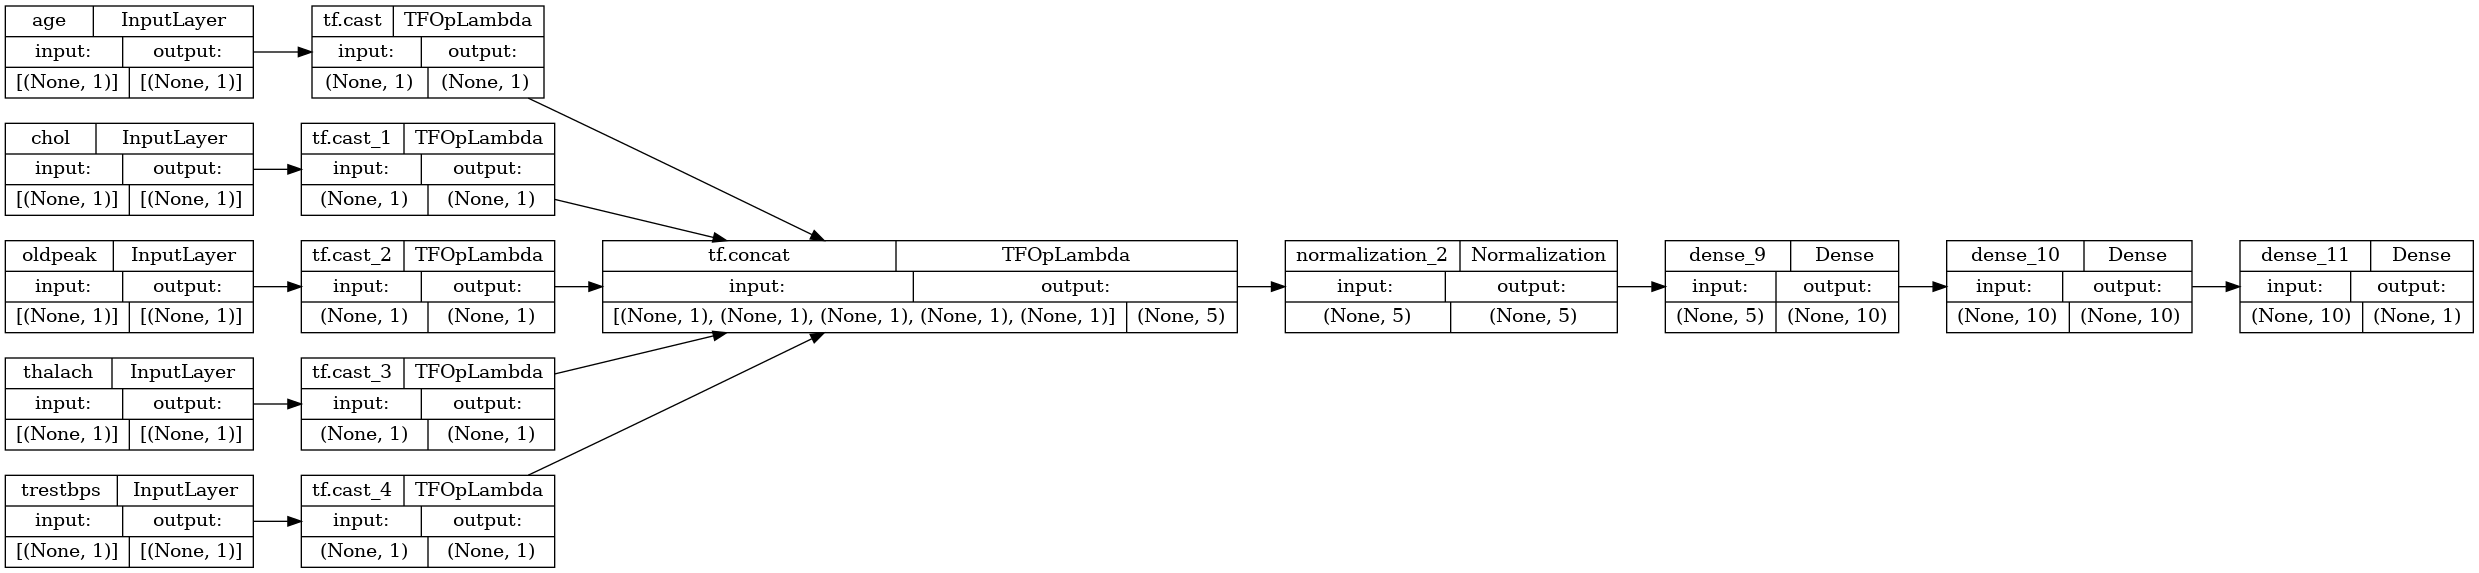

In [25]:
tf.keras.utils.plot_model(model, rankdir="LR", show_shapes=True)

모델 서브 클래스와 동일한 방식으로 기능적 모델을 훈련할 수 있습니다.

In [26]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5


  1/152 [..............................] - ETA: 1:46 - loss: 0.8923 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.7587 - accuracy: 0.7500  

  7/152 [>.............................] - ETA: 3s - loss: 0.7375 - accuracy: 0.6429

 10/152 [>.............................] - ETA: 3s - loss: 0.7076 - accuracy: 0.6500

 13/152 [=>............................] - ETA: 3s - loss: 0.7249 - accuracy: 0.6923

 15/152 [=>............................] - ETA: 3s - loss: 0.7448 - accuracy: 0.7000

 18/152 [==>...........................] - ETA: 3s - loss: 0.7272 - accuracy: 0.7222

 20/152 [==>...........................] - ETA: 3s - loss: 0.7232 - accuracy: 0.7000

 22/152 [===>..........................] - ETA: 3s - loss: 0.7195 - accuracy: 0.6818

 25/152 [===>..........................] - ETA: 3s - loss: 0.7166 - accuracy: 0.7000

 28/152 [====>.........................] - ETA: 2s - loss: 0.7197 - accuracy: 0.6964

 31/152 [=====>........................] - ETA: 2s - loss: 0.7237 - accuracy: 0.7097

 34/152 [=====>........................] - ETA: 2s - loss: 0.7254 - accuracy: 0.7353

 37/152 [======>.......................] - ETA: 2s - loss: 0.7209 - accuracy: 0.7432

 40/152 [======>.......................] - ETA: 2s - loss: 0.7206 - accuracy: 0.7250

 43/152 [=======>......................] - ETA: 2s - loss: 0.7159 - accuracy: 0.7209

 46/152 [========>.....................] - ETA: 2s - loss: 0.7194 - accuracy: 0.7065

 49/152 [========>.....................] - ETA: 2s - loss: 0.7178 - accuracy: 0.7041

 52/152 [=========>....................] - ETA: 2s - loss: 0.7146 - accuracy: 0.7115

 55/152 [=========>....................] - ETA: 2s - loss: 0.7105 - accuracy: 0.7091

 58/152 [==========>...................] - ETA: 2s - loss: 0.7073 - accuracy: 0.7155

 61/152 [===========>..................] - ETA: 2s - loss: 0.7062 - accuracy: 0.7131

 64/152 [===========>..................] - ETA: 2s - loss: 0.7042 - accuracy: 0.7031

 67/152 [============>.................] - ETA: 2s - loss: 0.7014 - accuracy: 0.7164

 70/152 [============>.................] - ETA: 1s - loss: 0.7001 - accuracy: 0.7214

 73/152 [=============>................] - ETA: 1s - loss: 0.7001 - accuracy: 0.7192

 76/152 [==============>...............] - ETA: 1s - loss: 0.6955 - accuracy: 0.7105

 79/152 [==============>...............] - ETA: 1s - loss: 0.6952 - accuracy: 0.7089

 82/152 [===============>..............] - ETA: 1s - loss: 0.6927 - accuracy: 0.7195

 85/152 [===============>..............] - ETA: 1s - loss: 0.6920 - accuracy: 0.7235

 88/152 [================>.............] - ETA: 1s - loss: 0.6898 - accuracy: 0.7273

 91/152 [================>.............] - ETA: 1s - loss: 0.6876 - accuracy: 0.7363

 94/152 [=================>............] - ETA: 1s - loss: 0.6850 - accuracy: 0.7447

 97/152 [==================>...........] - ETA: 1s - loss: 0.6848 - accuracy: 0.7423

100/152 [==================>...........] - ETA: 1s - loss: 0.6843 - accuracy: 0.7350

103/152 [===================>..........] - ETA: 1s - loss: 0.6822 - accuracy: 0.7427

106/152 [===================>..........] - ETA: 1s - loss: 0.6844 - accuracy: 0.7358

109/152 [====================>.........] - ETA: 1s - loss: 0.6808 - accuracy: 0.7385

112/152 [=====================>........] - ETA: 0s - loss: 0.6791 - accuracy: 0.7321

115/152 [=====================>........] - ETA: 0s - loss: 0.6778 - accuracy: 0.7304

118/152 [======================>.......] - ETA: 0s - loss: 0.6756 - accuracy: 0.7331

121/152 [======================>.......] - ETA: 0s - loss: 0.6751 - accuracy: 0.7314

124/152 [=======================>......] - ETA: 0s - loss: 0.6742 - accuracy: 0.7258

127/152 [========================>.....] - ETA: 0s - loss: 0.6731 - accuracy: 0.7244

130/152 [========================>.....] - ETA: 0s - loss: 0.6695 - accuracy: 0.7308

133/152 [=========================>....] - ETA: 0s - loss: 0.6682 - accuracy: 0.7331

136/152 [=========================>....] - ETA: 0s - loss: 0.6678 - accuracy: 0.7279

139/152 [==========================>...] - ETA: 0s - loss: 0.6685 - accuracy: 0.7230

142/152 [===========================>..] - ETA: 0s - loss: 0.6665 - accuracy: 0.7183

145/152 [===========================>..] - ETA: 0s - loss: 0.6649 - accuracy: 0.7207

148/152 [============================>.] - ETA: 0s - loss: 0.6629 - accuracy: 0.7230

151/152 [============================>.] - ETA: 0s - loss: 0.6602 - accuracy: 0.7285

152/152 [==============================] - 4s 24ms/step - loss: 0.6597 - accuracy: 0.7261


Epoch 2/5


  1/152 [..............................] - ETA: 3s - loss: 0.5899 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.5424 - accuracy: 0.8750

  7/152 [>.............................] - ETA: 3s - loss: 0.5722 - accuracy: 0.7857

 10/152 [>.............................] - ETA: 3s - loss: 0.5932 - accuracy: 0.7000

 13/152 [=>............................] - ETA: 3s - loss: 0.5906 - accuracy: 0.6923

 16/152 [==>...........................] - ETA: 3s - loss: 0.5882 - accuracy: 0.7188

 19/152 [==>...........................] - ETA: 3s - loss: 0.5887 - accuracy: 0.7105

 22/152 [===>..........................] - ETA: 2s - loss: 0.5922 - accuracy: 0.7045

 24/152 [===>..........................] - ETA: 2s - loss: 0.5892 - accuracy: 0.7083

 27/152 [====>.........................] - ETA: 2s - loss: 0.5978 - accuracy: 0.7037

 30/152 [====>.........................] - ETA: 2s - loss: 0.5975 - accuracy: 0.7000

 33/152 [=====>........................] - ETA: 2s - loss: 0.5990 - accuracy: 0.7273

 36/152 [======>.......................] - ETA: 2s - loss: 0.5905 - accuracy: 0.7500

 39/152 [======>.......................] - ETA: 2s - loss: 0.5808 - accuracy: 0.7564

 42/152 [=======>......................] - ETA: 2s - loss: 0.5817 - accuracy: 0.7619

 44/152 [=======>......................] - ETA: 2s - loss: 0.5919 - accuracy: 0.7500

 46/152 [========>.....................] - ETA: 2s - loss: 0.5919 - accuracy: 0.7500

 49/152 [========>.....................] - ETA: 2s - loss: 0.5835 - accuracy: 0.7551

 52/152 [=========>....................] - ETA: 2s - loss: 0.5811 - accuracy: 0.7500

 55/152 [=========>....................] - ETA: 2s - loss: 0.5862 - accuracy: 0.7455

 58/152 [==========>...................] - ETA: 2s - loss: 0.5804 - accuracy: 0.7414

 61/152 [===========>..................] - ETA: 2s - loss: 0.5752 - accuracy: 0.7459

 64/152 [===========>..................] - ETA: 2s - loss: 0.5712 - accuracy: 0.7500

 67/152 [============>.................] - ETA: 1s - loss: 0.5676 - accuracy: 0.7537

 70/152 [============>.................] - ETA: 1s - loss: 0.5685 - accuracy: 0.7571

 73/152 [=============>................] - ETA: 1s - loss: 0.5791 - accuracy: 0.7397

 76/152 [==============>...............] - ETA: 1s - loss: 0.5765 - accuracy: 0.7500

 79/152 [==============>...............] - ETA: 1s - loss: 0.5761 - accuracy: 0.7468

 82/152 [===============>..............] - ETA: 1s - loss: 0.5700 - accuracy: 0.7561

 85/152 [===============>..............] - ETA: 1s - loss: 0.5753 - accuracy: 0.7412

 88/152 [================>.............] - ETA: 1s - loss: 0.5722 - accuracy: 0.7500

 91/152 [================>.............] - ETA: 1s - loss: 0.5691 - accuracy: 0.7473

 94/152 [=================>............] - ETA: 1s - loss: 0.5695 - accuracy: 0.7500

 97/152 [==================>...........] - ETA: 1s - loss: 0.5662 - accuracy: 0.7526

100/152 [==================>...........] - ETA: 1s - loss: 0.5603 - accuracy: 0.7600

103/152 [===================>..........] - ETA: 1s - loss: 0.5573 - accuracy: 0.7670

106/152 [===================>..........] - ETA: 1s - loss: 0.5535 - accuracy: 0.7689

109/152 [====================>.........] - ETA: 0s - loss: 0.5562 - accuracy: 0.7615

112/152 [=====================>........] - ETA: 0s - loss: 0.5560 - accuracy: 0.7634

115/152 [=====================>........] - ETA: 0s - loss: 0.5527 - accuracy: 0.7652

118/152 [======================>.......] - ETA: 0s - loss: 0.5562 - accuracy: 0.7627

121/152 [======================>.......] - ETA: 0s - loss: 0.5508 - accuracy: 0.7686

124/152 [=======================>......] - ETA: 0s - loss: 0.5500 - accuracy: 0.7661

127/152 [========================>.....] - ETA: 0s - loss: 0.5507 - accuracy: 0.7598

130/152 [========================>.....] - ETA: 0s - loss: 0.5591 - accuracy: 0.7462

133/152 [=========================>....] - ETA: 0s - loss: 0.5563 - accuracy: 0.7519

136/152 [=========================>....] - ETA: 0s - loss: 0.5547 - accuracy: 0.7500

139/152 [==========================>...] - ETA: 0s - loss: 0.5524 - accuracy: 0.7518

142/152 [===========================>..] - ETA: 0s - loss: 0.5533 - accuracy: 0.7500

145/152 [===========================>..] - ETA: 0s - loss: 0.5507 - accuracy: 0.7517

148/152 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7466

151/152 [============================>.] - ETA: 0s - loss: 0.5550 - accuracy: 0.7483

152/152 [==============================] - 4s 23ms/step - loss: 0.5541 - accuracy: 0.7492


Epoch 3/5


  1/152 [..............................] - ETA: 3s - loss: 0.3662 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.5704 - accuracy: 0.6250

  7/152 [>.............................] - ETA: 3s - loss: 0.5928 - accuracy: 0.6429

 10/152 [>.............................] - ETA: 3s - loss: 0.5667 - accuracy: 0.7000

 13/152 [=>............................] - ETA: 3s - loss: 0.5431 - accuracy: 0.6923

 16/152 [==>...........................] - ETA: 3s - loss: 0.5361 - accuracy: 0.6875

 19/152 [==>...........................] - ETA: 2s - loss: 0.5224 - accuracy: 0.7105

 22/152 [===>..........................] - ETA: 2s - loss: 0.4983 - accuracy: 0.7500

 25/152 [===>..........................] - ETA: 2s - loss: 0.4829 - accuracy: 0.7600

 28/152 [====>.........................] - ETA: 2s - loss: 0.4895 - accuracy: 0.7500

 31/152 [=====>........................] - ETA: 2s - loss: 0.5026 - accuracy: 0.7419

 34/152 [=====>........................] - ETA: 2s - loss: 0.5123 - accuracy: 0.7353

 37/152 [======>.......................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7027

 40/152 [======>.......................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7000

 43/152 [=======>......................] - ETA: 2s - loss: 0.5501 - accuracy: 0.6977

 46/152 [========>.....................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7174

 49/152 [========>.....................] - ETA: 2s - loss: 0.5266 - accuracy: 0.7347

 52/152 [=========>....................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7308

 55/152 [=========>....................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7182

 58/152 [==========>...................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7241

 61/152 [===========>..................] - ETA: 2s - loss: 0.5257 - accuracy: 0.7377

 64/152 [===========>..................] - ETA: 2s - loss: 0.5249 - accuracy: 0.7344

 67/152 [============>.................] - ETA: 1s - loss: 0.5291 - accuracy: 0.7239

 70/152 [============>.................] - ETA: 1s - loss: 0.5296 - accuracy: 0.7214

 73/152 [=============>................] - ETA: 1s - loss: 0.5238 - accuracy: 0.7329

 76/152 [==============>...............] - ETA: 1s - loss: 0.5179 - accuracy: 0.7368

 79/152 [==============>...............] - ETA: 1s - loss: 0.5092 - accuracy: 0.7468

 82/152 [===============>..............] - ETA: 1s - loss: 0.5031 - accuracy: 0.7561

 85/152 [===============>..............] - ETA: 1s - loss: 0.4974 - accuracy: 0.7529

 88/152 [================>.............] - ETA: 1s - loss: 0.4987 - accuracy: 0.7557

 91/152 [================>.............] - ETA: 1s - loss: 0.4956 - accuracy: 0.7582

 94/152 [=================>............] - ETA: 1s - loss: 0.5019 - accuracy: 0.7500

 97/152 [==================>...........] - ETA: 1s - loss: 0.4985 - accuracy: 0.7526

100/152 [==================>...........] - ETA: 1s - loss: 0.4946 - accuracy: 0.7550

103/152 [===================>..........] - ETA: 1s - loss: 0.4956 - accuracy: 0.7524

106/152 [===================>..........] - ETA: 1s - loss: 0.4951 - accuracy: 0.7547

109/152 [====================>.........] - ETA: 0s - loss: 0.4910 - accuracy: 0.7615

112/152 [=====================>........] - ETA: 0s - loss: 0.4938 - accuracy: 0.7589

115/152 [=====================>........] - ETA: 0s - loss: 0.5014 - accuracy: 0.7478

118/152 [======================>.......] - ETA: 0s - loss: 0.4951 - accuracy: 0.7542

121/152 [======================>.......] - ETA: 0s - loss: 0.4967 - accuracy: 0.7479

124/152 [=======================>......] - ETA: 0s - loss: 0.4943 - accuracy: 0.7500

127/152 [========================>.....] - ETA: 0s - loss: 0.4904 - accuracy: 0.7559

130/152 [========================>.....] - ETA: 0s - loss: 0.4907 - accuracy: 0.7538

133/152 [=========================>....] - ETA: 0s - loss: 0.4881 - accuracy: 0.7556

136/152 [=========================>....] - ETA: 0s - loss: 0.4955 - accuracy: 0.7426

139/152 [==========================>...] - ETA: 0s - loss: 0.4916 - accuracy: 0.7446

142/152 [===========================>..] - ETA: 0s - loss: 0.4891 - accuracy: 0.7465

145/152 [===========================>..] - ETA: 0s - loss: 0.4885 - accuracy: 0.7517

148/152 [============================>.] - ETA: 0s - loss: 0.4885 - accuracy: 0.7534

151/152 [============================>.] - ETA: 0s - loss: 0.4867 - accuracy: 0.7550

152/152 [==============================] - 4s 23ms/step - loss: 0.4860 - accuracy: 0.7558


Epoch 4/5


  1/152 [..............................] - ETA: 3s - loss: 0.2242 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.4194 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.4611 - accuracy: 0.7143

 10/152 [>.............................] - ETA: 3s - loss: 0.4430 - accuracy: 0.7500

 13/152 [=>............................] - ETA: 3s - loss: 0.4087 - accuracy: 0.7692

 16/152 [==>...........................] - ETA: 3s - loss: 0.4306 - accuracy: 0.7812

 19/152 [==>...........................] - ETA: 3s - loss: 0.4888 - accuracy: 0.7368

 22/152 [===>..........................] - ETA: 3s - loss: 0.4736 - accuracy: 0.7273

 24/152 [===>..........................] - ETA: 3s - loss: 0.4525 - accuracy: 0.7500

 26/152 [====>.........................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7692

 29/152 [====>.........................] - ETA: 2s - loss: 0.4281 - accuracy: 0.7759

 31/152 [=====>........................] - ETA: 2s - loss: 0.4289 - accuracy: 0.7742

 33/152 [=====>........................] - ETA: 2s - loss: 0.4108 - accuracy: 0.7879

 36/152 [======>.......................] - ETA: 2s - loss: 0.3994 - accuracy: 0.7917

 39/152 [======>.......................] - ETA: 2s - loss: 0.3930 - accuracy: 0.7821

 42/152 [=======>......................] - ETA: 2s - loss: 0.3908 - accuracy: 0.7857

 45/152 [=======>......................] - ETA: 2s - loss: 0.4037 - accuracy: 0.7778

 48/152 [========>.....................] - ETA: 2s - loss: 0.4042 - accuracy: 0.7708

 51/152 [=========>....................] - ETA: 2s - loss: 0.4236 - accuracy: 0.7549

 54/152 [=========>....................] - ETA: 2s - loss: 0.4379 - accuracy: 0.7500

 57/152 [==========>...................] - ETA: 2s - loss: 0.4202 - accuracy: 0.7632

 60/152 [==========>...................] - ETA: 2s - loss: 0.4176 - accuracy: 0.7667

 63/152 [===========>..................] - ETA: 2s - loss: 0.4236 - accuracy: 0.7698

 66/152 [============>.................] - ETA: 2s - loss: 0.4220 - accuracy: 0.7727

 69/152 [============>.................] - ETA: 1s - loss: 0.4258 - accuracy: 0.7681

 72/152 [=============>................] - ETA: 1s - loss: 0.4184 - accuracy: 0.7708

 75/152 [=============>................] - ETA: 1s - loss: 0.4289 - accuracy: 0.7600

 78/152 [==============>...............] - ETA: 1s - loss: 0.4206 - accuracy: 0.7692

 81/152 [==============>...............] - ETA: 1s - loss: 0.4391 - accuracy: 0.7593

 84/152 [===============>..............] - ETA: 1s - loss: 0.4438 - accuracy: 0.7560

 87/152 [================>.............] - ETA: 1s - loss: 0.4515 - accuracy: 0.7529

 90/152 [================>.............] - ETA: 1s - loss: 0.4515 - accuracy: 0.7500

 93/152 [=================>............] - ETA: 1s - loss: 0.4503 - accuracy: 0.7527

 96/152 [=================>............] - ETA: 1s - loss: 0.4479 - accuracy: 0.7552

 99/152 [==================>...........] - ETA: 1s - loss: 0.4448 - accuracy: 0.7576

102/152 [===================>..........] - ETA: 1s - loss: 0.4422 - accuracy: 0.7598

105/152 [===================>..........] - ETA: 1s - loss: 0.4595 - accuracy: 0.7476

108/152 [====================>.........] - ETA: 1s - loss: 0.4680 - accuracy: 0.7407

111/152 [====================>.........] - ETA: 0s - loss: 0.4606 - accuracy: 0.7477

114/152 [=====================>........] - ETA: 0s - loss: 0.4557 - accuracy: 0.7500

117/152 [======================>.......] - ETA: 0s - loss: 0.4598 - accuracy: 0.7521

120/152 [======================>.......] - ETA: 0s - loss: 0.4661 - accuracy: 0.7500

123/152 [=======================>......] - ETA: 0s - loss: 0.4637 - accuracy: 0.7480

126/152 [=======================>......] - ETA: 0s - loss: 0.4584 - accuracy: 0.7540

129/152 [========================>.....] - ETA: 0s - loss: 0.4603 - accuracy: 0.7481

132/152 [=========================>....] - ETA: 0s - loss: 0.4594 - accuracy: 0.7500

135/152 [=========================>....] - ETA: 0s - loss: 0.4596 - accuracy: 0.7519

138/152 [==========================>...] - ETA: 0s - loss: 0.4573 - accuracy: 0.7536

141/152 [==========================>...] - ETA: 0s - loss: 0.4559 - accuracy: 0.7553

143/152 [===========================>..] - ETA: 0s - loss: 0.4551 - accuracy: 0.7587

146/152 [===========================>..] - ETA: 0s - loss: 0.4530 - accuracy: 0.7568

149/152 [============================>.] - ETA: 0s - loss: 0.4603 - accuracy: 0.7550

152/152 [==============================] - ETA: 0s - loss: 0.4570 - accuracy: 0.7591

152/152 [==============================] - 4s 24ms/step - loss: 0.4570 - accuracy: 0.7591


Epoch 5/5


  1/152 [..............................] - ETA: 3s - loss: 0.5901 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.6529 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.6100 - accuracy: 0.7143

 10/152 [>.............................] - ETA: 3s - loss: 0.4664 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 3s - loss: 0.4110 - accuracy: 0.8462

 16/152 [==>...........................] - ETA: 3s - loss: 0.3717 - accuracy: 0.8438

 19/152 [==>...........................] - ETA: 3s - loss: 0.3731 - accuracy: 0.7895

 22/152 [===>..........................] - ETA: 3s - loss: 0.3791 - accuracy: 0.7727

 25/152 [===>..........................] - ETA: 2s - loss: 0.3662 - accuracy: 0.8000

 28/152 [====>.........................] - ETA: 2s - loss: 0.3623 - accuracy: 0.8214

 31/152 [=====>........................] - ETA: 2s - loss: 0.3754 - accuracy: 0.7903

 34/152 [=====>........................] - ETA: 2s - loss: 0.4289 - accuracy: 0.7647

 37/152 [======>.......................] - ETA: 2s - loss: 0.4586 - accuracy: 0.7432

 40/152 [======>.......................] - ETA: 2s - loss: 0.4544 - accuracy: 0.7625

 43/152 [=======>......................] - ETA: 2s - loss: 0.4622 - accuracy: 0.7674

 46/152 [========>.....................] - ETA: 2s - loss: 0.4482 - accuracy: 0.7717

 49/152 [========>.....................] - ETA: 2s - loss: 0.4466 - accuracy: 0.7755

 52/152 [=========>....................] - ETA: 2s - loss: 0.4531 - accuracy: 0.7692

 55/152 [=========>....................] - ETA: 2s - loss: 0.4607 - accuracy: 0.7636

 58/152 [==========>...................] - ETA: 2s - loss: 0.4547 - accuracy: 0.7672

 61/152 [===========>..................] - ETA: 2s - loss: 0.4395 - accuracy: 0.7787

 64/152 [===========>..................] - ETA: 2s - loss: 0.4381 - accuracy: 0.7812

 67/152 [============>.................] - ETA: 2s - loss: 0.4413 - accuracy: 0.7836

 70/152 [============>.................] - ETA: 1s - loss: 0.4381 - accuracy: 0.7857

 73/152 [=============>................] - ETA: 1s - loss: 0.4385 - accuracy: 0.7877

 76/152 [==============>...............] - ETA: 1s - loss: 0.4401 - accuracy: 0.7829

 79/152 [==============>...............] - ETA: 1s - loss: 0.4470 - accuracy: 0.7785

 82/152 [===============>..............] - ETA: 1s - loss: 0.4531 - accuracy: 0.7805

 84/152 [===============>..............] - ETA: 1s - loss: 0.4635 - accuracy: 0.7798

 86/152 [===============>..............] - ETA: 1s - loss: 0.4620 - accuracy: 0.7849

 89/152 [================>.............] - ETA: 1s - loss: 0.4543 - accuracy: 0.7865

 92/152 [=================>............] - ETA: 1s - loss: 0.4477 - accuracy: 0.7935

 95/152 [=================>............] - ETA: 1s - loss: 0.4501 - accuracy: 0.7895

 98/152 [==================>...........] - ETA: 1s - loss: 0.4464 - accuracy: 0.7857

101/152 [==================>...........] - ETA: 1s - loss: 0.4501 - accuracy: 0.7871

104/152 [===================>..........] - ETA: 1s - loss: 0.4513 - accuracy: 0.7837

107/152 [====================>.........] - ETA: 1s - loss: 0.4477 - accuracy: 0.7850

110/152 [====================>.........] - ETA: 0s - loss: 0.4407 - accuracy: 0.7909

113/152 [=====================>........] - ETA: 0s - loss: 0.4381 - accuracy: 0.7920

116/152 [=====================>........] - ETA: 0s - loss: 0.4342 - accuracy: 0.7931

119/152 [======================>.......] - ETA: 0s - loss: 0.4328 - accuracy: 0.7899

122/152 [=======================>......] - ETA: 0s - loss: 0.4476 - accuracy: 0.7787

125/152 [=======================>......] - ETA: 0s - loss: 0.4597 - accuracy: 0.7680

128/152 [========================>.....] - ETA: 0s - loss: 0.4540 - accuracy: 0.7734

131/152 [========================>.....] - ETA: 0s - loss: 0.4527 - accuracy: 0.7748

134/152 [=========================>....] - ETA: 0s - loss: 0.4485 - accuracy: 0.7761

137/152 [==========================>...] - ETA: 0s - loss: 0.4554 - accuracy: 0.7701

139/152 [==========================>...] - ETA: 0s - loss: 0.4530 - accuracy: 0.7698

142/152 [===========================>..] - ETA: 0s - loss: 0.4516 - accuracy: 0.7711

145/152 [===========================>..] - ETA: 0s - loss: 0.4501 - accuracy: 0.7690

148/152 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.7736

151/152 [============================>.] - ETA: 0s - loss: 0.4438 - accuracy: 0.7715

152/152 [==============================] - 4s 24ms/step - loss: 0.4431 - accuracy: 0.7723


In [27]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5


  1/152 [..............................] - ETA: 4s - loss: 0.0798 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.1801 - accuracy: 1.0000

  7/152 [>.............................] - ETA: 3s - loss: 0.3198 - accuracy: 0.7857

 10/152 [>.............................] - ETA: 3s - loss: 0.3114 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 3s - loss: 0.4364 - accuracy: 0.7308

 16/152 [==>...........................] - ETA: 3s - loss: 0.4904 - accuracy: 0.6875

 19/152 [==>...........................] - ETA: 3s - loss: 0.4533 - accuracy: 0.7105

 22/152 [===>..........................] - ETA: 3s - loss: 0.4342 - accuracy: 0.7500

 25/152 [===>..........................] - ETA: 3s - loss: 0.4594 - accuracy: 0.7400

 28/152 [====>.........................] - ETA: 3s - loss: 0.4460 - accuracy: 0.7500

 31/152 [=====>........................] - ETA: 2s - loss: 0.4337 - accuracy: 0.7581

 34/152 [=====>........................] - ETA: 2s - loss: 0.4184 - accuracy: 0.7794

 37/152 [======>.......................] - ETA: 2s - loss: 0.4101 - accuracy: 0.7838

 40/152 [======>.......................] - ETA: 2s - loss: 0.4321 - accuracy: 0.7500

 43/152 [=======>......................] - ETA: 2s - loss: 0.4280 - accuracy: 0.7558

 46/152 [========>.....................] - ETA: 2s - loss: 0.4189 - accuracy: 0.7609

 49/152 [========>.....................] - ETA: 2s - loss: 0.4131 - accuracy: 0.7653

 52/152 [=========>....................] - ETA: 2s - loss: 0.4064 - accuracy: 0.7692

 55/152 [=========>....................] - ETA: 2s - loss: 0.4298 - accuracy: 0.7545

 58/152 [==========>...................] - ETA: 2s - loss: 0.4314 - accuracy: 0.7500

 60/152 [==========>...................] - ETA: 2s - loss: 0.4290 - accuracy: 0.7500

 62/152 [===========>..................] - ETA: 2s - loss: 0.4299 - accuracy: 0.7500

 64/152 [===========>..................] - ETA: 2s - loss: 0.4433 - accuracy: 0.7500

 66/152 [============>.................] - ETA: 2s - loss: 0.4399 - accuracy: 0.7500

 68/152 [============>.................] - ETA: 2s - loss: 0.4310 - accuracy: 0.7574

 71/152 [=============>................] - ETA: 1s - loss: 0.4408 - accuracy: 0.7465

 73/152 [=============>................] - ETA: 1s - loss: 0.4469 - accuracy: 0.7397

 76/152 [==============>...............] - ETA: 1s - loss: 0.4411 - accuracy: 0.7434

 79/152 [==============>...............] - ETA: 1s - loss: 0.4435 - accuracy: 0.7405

 82/152 [===============>..............] - ETA: 1s - loss: 0.4490 - accuracy: 0.7439

 85/152 [===============>..............] - ETA: 1s - loss: 0.4431 - accuracy: 0.7529

 88/152 [================>.............] - ETA: 1s - loss: 0.4334 - accuracy: 0.7614

 91/152 [================>.............] - ETA: 1s - loss: 0.4251 - accuracy: 0.7692

 93/152 [=================>............] - ETA: 1s - loss: 0.4197 - accuracy: 0.7742

 95/152 [=================>............] - ETA: 1s - loss: 0.4200 - accuracy: 0.7737

 97/152 [==================>...........] - ETA: 1s - loss: 0.4222 - accuracy: 0.7680

 99/152 [==================>...........] - ETA: 1s - loss: 0.4188 - accuracy: 0.7727

101/152 [==================>...........] - ETA: 1s - loss: 0.4165 - accuracy: 0.7723

104/152 [===================>..........] - ETA: 1s - loss: 0.4128 - accuracy: 0.7788

107/152 [====================>.........] - ETA: 1s - loss: 0.4118 - accuracy: 0.7757

109/152 [====================>.........] - ETA: 1s - loss: 0.4094 - accuracy: 0.7752

111/152 [====================>.........] - ETA: 1s - loss: 0.4166 - accuracy: 0.7703

113/152 [=====================>........] - ETA: 0s - loss: 0.4207 - accuracy: 0.7611

115/152 [=====================>........] - ETA: 0s - loss: 0.4170 - accuracy: 0.7652

118/152 [======================>.......] - ETA: 0s - loss: 0.4237 - accuracy: 0.7669

121/152 [======================>.......] - ETA: 0s - loss: 0.4298 - accuracy: 0.7645

123/152 [=======================>......] - ETA: 0s - loss: 0.4278 - accuracy: 0.7683

126/152 [=======================>......] - ETA: 0s - loss: 0.4242 - accuracy: 0.7698

129/152 [========================>.....] - ETA: 0s - loss: 0.4252 - accuracy: 0.7713

132/152 [=========================>....] - ETA: 0s - loss: 0.4199 - accuracy: 0.7727

135/152 [=========================>....] - ETA: 0s - loss: 0.4202 - accuracy: 0.7704

138/152 [==========================>...] - ETA: 0s - loss: 0.4203 - accuracy: 0.7717

141/152 [==========================>...] - ETA: 0s - loss: 0.4248 - accuracy: 0.7730

144/152 [===========================>..] - ETA: 0s - loss: 0.4265 - accuracy: 0.7743

147/152 [============================>.] - ETA: 0s - loss: 0.4253 - accuracy: 0.7755

150/152 [============================>.] - ETA: 0s - loss: 0.4305 - accuracy: 0.7733

152/152 [==============================] - 4s 24ms/step - loss: 0.4361 - accuracy: 0.7723


Epoch 2/5


  1/152 [..............................] - ETA: 4s - loss: 0.5966 - accuracy: 0.0000e+00

  4/152 [..............................] - ETA: 3s - loss: 0.3378 - accuracy: 0.6250    

  7/152 [>.............................] - ETA: 3s - loss: 0.2997 - accuracy: 0.7143

 10/152 [>.............................] - ETA: 3s - loss: 0.3018 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 3s - loss: 0.3303 - accuracy: 0.7692

 16/152 [==>...........................] - ETA: 3s - loss: 0.3553 - accuracy: 0.7812

 18/152 [==>...........................] - ETA: 3s - loss: 0.3600 - accuracy: 0.7778

 21/152 [===>..........................] - ETA: 3s - loss: 0.3715 - accuracy: 0.7857

 24/152 [===>..........................] - ETA: 3s - loss: 0.4431 - accuracy: 0.7500

 27/152 [====>.........................] - ETA: 3s - loss: 0.4423 - accuracy: 0.7407

 30/152 [====>.........................] - ETA: 2s - loss: 0.4359 - accuracy: 0.7500

 33/152 [=====>........................] - ETA: 2s - loss: 0.4332 - accuracy: 0.7727

 36/152 [======>.......................] - ETA: 2s - loss: 0.4270 - accuracy: 0.7778

 38/152 [======>.......................] - ETA: 2s - loss: 0.4193 - accuracy: 0.7895

 41/152 [=======>......................] - ETA: 2s - loss: 0.3959 - accuracy: 0.8049

 43/152 [=======>......................] - ETA: 2s - loss: 0.3812 - accuracy: 0.8140

 45/152 [=======>......................] - ETA: 2s - loss: 0.4009 - accuracy: 0.8000

 48/152 [========>.....................] - ETA: 2s - loss: 0.4115 - accuracy: 0.8021

 51/152 [=========>....................] - ETA: 2s - loss: 0.4020 - accuracy: 0.8039

 54/152 [=========>....................] - ETA: 2s - loss: 0.4084 - accuracy: 0.7963

 57/152 [==========>...................] - ETA: 2s - loss: 0.3961 - accuracy: 0.7982

 60/152 [==========>...................] - ETA: 2s - loss: 0.3904 - accuracy: 0.8083

 63/152 [===========>..................] - ETA: 2s - loss: 0.3932 - accuracy: 0.7937

 66/152 [============>.................] - ETA: 2s - loss: 0.4024 - accuracy: 0.7879

 69/152 [============>.................] - ETA: 2s - loss: 0.4039 - accuracy: 0.7899

 71/152 [=============>................] - ETA: 1s - loss: 0.4100 - accuracy: 0.7817

 74/152 [=============>................] - ETA: 1s - loss: 0.4035 - accuracy: 0.7838

 76/152 [==============>...............] - ETA: 1s - loss: 0.4123 - accuracy: 0.7829

 78/152 [==============>...............] - ETA: 1s - loss: 0.4209 - accuracy: 0.7821

 81/152 [==============>...............] - ETA: 1s - loss: 0.4104 - accuracy: 0.7840

 83/152 [===============>..............] - ETA: 1s - loss: 0.4047 - accuracy: 0.7892

 85/152 [===============>..............] - ETA: 1s - loss: 0.3971 - accuracy: 0.7941

 87/152 [================>.............] - ETA: 1s - loss: 0.3990 - accuracy: 0.7931

 89/152 [================>.............] - ETA: 1s - loss: 0.4038 - accuracy: 0.7865

 91/152 [================>.............] - ETA: 1s - loss: 0.3985 - accuracy: 0.7912

 93/152 [=================>............] - ETA: 1s - loss: 0.4137 - accuracy: 0.7796

 95/152 [=================>............] - ETA: 1s - loss: 0.4095 - accuracy: 0.7842

 97/152 [==================>...........] - ETA: 1s - loss: 0.4031 - accuracy: 0.7887

 99/152 [==================>...........] - ETA: 1s - loss: 0.4108 - accuracy: 0.7879

101/152 [==================>...........] - ETA: 1s - loss: 0.4095 - accuracy: 0.7871

103/152 [===================>..........] - ETA: 1s - loss: 0.4060 - accuracy: 0.7913

105/152 [===================>..........] - ETA: 1s - loss: 0.4111 - accuracy: 0.7857

107/152 [====================>.........] - ETA: 1s - loss: 0.4063 - accuracy: 0.7897

109/152 [====================>.........] - ETA: 1s - loss: 0.4060 - accuracy: 0.7890

111/152 [====================>.........] - ETA: 1s - loss: 0.4204 - accuracy: 0.7838

114/152 [=====================>........] - ETA: 0s - loss: 0.4239 - accuracy: 0.7851

116/152 [=====================>........] - ETA: 0s - loss: 0.4257 - accuracy: 0.7845

118/152 [======================>.......] - ETA: 0s - loss: 0.4257 - accuracy: 0.7839

120/152 [======================>.......] - ETA: 0s - loss: 0.4383 - accuracy: 0.7750

123/152 [=======================>......] - ETA: 0s - loss: 0.4315 - accuracy: 0.7805

125/152 [=======================>......] - ETA: 0s - loss: 0.4308 - accuracy: 0.7800

128/152 [========================>.....] - ETA: 0s - loss: 0.4336 - accuracy: 0.7812

131/152 [========================>.....] - ETA: 0s - loss: 0.4406 - accuracy: 0.7748

133/152 [=========================>....] - ETA: 0s - loss: 0.4379 - accuracy: 0.7782

135/152 [=========================>....] - ETA: 0s - loss: 0.4415 - accuracy: 0.7741

137/152 [==========================>...] - ETA: 0s - loss: 0.4357 - accuracy: 0.7774

140/152 [==========================>...] - ETA: 0s - loss: 0.4357 - accuracy: 0.7750

143/152 [===========================>..] - ETA: 0s - loss: 0.4371 - accuracy: 0.7762

146/152 [===========================>..] - ETA: 0s - loss: 0.4362 - accuracy: 0.7740

149/152 [============================>.] - ETA: 0s - loss: 0.4351 - accuracy: 0.7752

152/152 [==============================] - ETA: 0s - loss: 0.4314 - accuracy: 0.7756

152/152 [==============================] - 4s 25ms/step - loss: 0.4314 - accuracy: 0.7756


Epoch 3/5


  1/152 [..............................] - ETA: 3s - loss: 0.0543 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.5172 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.4220 - accuracy: 0.7857

 10/152 [>.............................] - ETA: 3s - loss: 0.4153 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 3s - loss: 0.4160 - accuracy: 0.8077

 15/152 [=>............................] - ETA: 3s - loss: 0.4188 - accuracy: 0.8000

 17/152 [==>...........................] - ETA: 3s - loss: 0.4177 - accuracy: 0.7941

 19/152 [==>...........................] - ETA: 3s - loss: 0.3950 - accuracy: 0.8158

 21/152 [===>..........................] - ETA: 3s - loss: 0.3707 - accuracy: 0.8333

 24/152 [===>..........................] - ETA: 3s - loss: 0.3746 - accuracy: 0.8125

 27/152 [====>.........................] - ETA: 3s - loss: 0.4158 - accuracy: 0.7963

 30/152 [====>.........................] - ETA: 3s - loss: 0.3938 - accuracy: 0.8000

 32/152 [=====>........................] - ETA: 2s - loss: 0.3840 - accuracy: 0.7969

 34/152 [=====>........................] - ETA: 2s - loss: 0.3684 - accuracy: 0.8088

 36/152 [======>.......................] - ETA: 2s - loss: 0.3638 - accuracy: 0.8194

 39/152 [======>.......................] - ETA: 2s - loss: 0.3520 - accuracy: 0.8205

 42/152 [=======>......................] - ETA: 2s - loss: 0.3462 - accuracy: 0.8333

 45/152 [=======>......................] - ETA: 2s - loss: 0.3672 - accuracy: 0.8222

 48/152 [========>.....................] - ETA: 2s - loss: 0.3584 - accuracy: 0.8229

 51/152 [=========>....................] - ETA: 2s - loss: 0.3684 - accuracy: 0.8235

 54/152 [=========>....................] - ETA: 2s - loss: 0.3905 - accuracy: 0.8056

 57/152 [==========>...................] - ETA: 2s - loss: 0.3980 - accuracy: 0.7982

 59/152 [==========>...................] - ETA: 2s - loss: 0.3987 - accuracy: 0.8051

 61/152 [===========>..................] - ETA: 2s - loss: 0.4013 - accuracy: 0.8033

 64/152 [===========>..................] - ETA: 2s - loss: 0.3994 - accuracy: 0.8125

 66/152 [============>.................] - ETA: 2s - loss: 0.3939 - accuracy: 0.8182

 68/152 [============>.................] - ETA: 2s - loss: 0.3887 - accuracy: 0.8235

 70/152 [============>.................] - ETA: 2s - loss: 0.3889 - accuracy: 0.8214

 72/152 [=============>................] - ETA: 1s - loss: 0.3814 - accuracy: 0.8264

 74/152 [=============>................] - ETA: 1s - loss: 0.3736 - accuracy: 0.8311

 76/152 [==============>...............] - ETA: 1s - loss: 0.3743 - accuracy: 0.8355

 78/152 [==============>...............] - ETA: 1s - loss: 0.3720 - accuracy: 0.8333

 80/152 [==============>...............] - ETA: 1s - loss: 0.3649 - accuracy: 0.8375

 82/152 [===============>..............] - ETA: 1s - loss: 0.3630 - accuracy: 0.8354

 84/152 [===============>..............] - ETA: 1s - loss: 0.3632 - accuracy: 0.8393

 87/152 [================>.............] - ETA: 1s - loss: 0.3776 - accuracy: 0.8276

 90/152 [================>.............] - ETA: 1s - loss: 0.3819 - accuracy: 0.8222

 92/152 [=================>............] - ETA: 1s - loss: 0.3834 - accuracy: 0.8207

 94/152 [=================>............] - ETA: 1s - loss: 0.3801 - accuracy: 0.8245

 96/152 [=================>............] - ETA: 1s - loss: 0.3814 - accuracy: 0.8229

 99/152 [==================>...........] - ETA: 1s - loss: 0.3990 - accuracy: 0.8131

102/152 [===================>..........] - ETA: 1s - loss: 0.4094 - accuracy: 0.8088

105/152 [===================>..........] - ETA: 1s - loss: 0.4108 - accuracy: 0.8048

107/152 [====================>.........] - ETA: 1s - loss: 0.4213 - accuracy: 0.7991

109/152 [====================>.........] - ETA: 1s - loss: 0.4179 - accuracy: 0.7982

111/152 [====================>.........] - ETA: 1s - loss: 0.4147 - accuracy: 0.7973

113/152 [=====================>........] - ETA: 0s - loss: 0.4100 - accuracy: 0.8009

115/152 [=====================>........] - ETA: 0s - loss: 0.4118 - accuracy: 0.7957

117/152 [======================>.......] - ETA: 0s - loss: 0.4144 - accuracy: 0.7906

119/152 [======================>.......] - ETA: 0s - loss: 0.4253 - accuracy: 0.7857

122/152 [=======================>......] - ETA: 0s - loss: 0.4300 - accuracy: 0.7828

125/152 [=======================>......] - ETA: 0s - loss: 0.4428 - accuracy: 0.7720

128/152 [========================>.....] - ETA: 0s - loss: 0.4408 - accuracy: 0.7734

131/152 [========================>.....] - ETA: 0s - loss: 0.4428 - accuracy: 0.7710

134/152 [=========================>....] - ETA: 0s - loss: 0.4431 - accuracy: 0.7724

137/152 [==========================>...] - ETA: 0s - loss: 0.4369 - accuracy: 0.7774

140/152 [==========================>...] - ETA: 0s - loss: 0.4298 - accuracy: 0.7821

143/152 [===========================>..] - ETA: 0s - loss: 0.4290 - accuracy: 0.7832

145/152 [===========================>..] - ETA: 0s - loss: 0.4258 - accuracy: 0.7862

147/152 [============================>.] - ETA: 0s - loss: 0.4292 - accuracy: 0.7823

150/152 [============================>.] - ETA: 0s - loss: 0.4255 - accuracy: 0.7833

152/152 [==============================] - 4s 25ms/step - loss: 0.4298 - accuracy: 0.7822


Epoch 4/5


  1/152 [..............................] - ETA: 4s - loss: 0.1276 - accuracy: 1.0000

  3/152 [..............................] - ETA: 3s - loss: 0.4202 - accuracy: 0.8333

  6/152 [>.............................] - ETA: 3s - loss: 0.3407 - accuracy: 0.8333

  9/152 [>.............................] - ETA: 3s - loss: 0.3301 - accuracy: 0.8889

 12/152 [=>............................] - ETA: 3s - loss: 0.3259 - accuracy: 0.8750

 14/152 [=>............................] - ETA: 3s - loss: 0.4021 - accuracy: 0.8571

 17/152 [==>...........................] - ETA: 3s - loss: 0.3908 - accuracy: 0.8529

 20/152 [==>...........................] - ETA: 3s - loss: 0.3890 - accuracy: 0.8500

 22/152 [===>..........................] - ETA: 3s - loss: 0.4083 - accuracy: 0.8182

 24/152 [===>..........................] - ETA: 3s - loss: 0.4091 - accuracy: 0.8125

 26/152 [====>.........................] - ETA: 3s - loss: 0.3930 - accuracy: 0.8077

 28/152 [====>.........................] - ETA: 3s - loss: 0.3832 - accuracy: 0.8036

 30/152 [====>.........................] - ETA: 3s - loss: 0.4001 - accuracy: 0.7833

 32/152 [=====>........................] - ETA: 2s - loss: 0.3833 - accuracy: 0.7969

 35/152 [=====>........................] - ETA: 2s - loss: 0.3714 - accuracy: 0.8143

 38/152 [======>.......................] - ETA: 2s - loss: 0.3586 - accuracy: 0.8289

 41/152 [=======>......................] - ETA: 2s - loss: 0.3472 - accuracy: 0.8415

 44/152 [=======>......................] - ETA: 2s - loss: 0.3318 - accuracy: 0.8523

 47/152 [========>.....................] - ETA: 2s - loss: 0.3429 - accuracy: 0.8511

 50/152 [========>.....................] - ETA: 2s - loss: 0.4055 - accuracy: 0.8200

 53/152 [=========>....................] - ETA: 2s - loss: 0.4186 - accuracy: 0.8113

 56/152 [==========>...................] - ETA: 2s - loss: 0.4094 - accuracy: 0.8125

 59/152 [==========>...................] - ETA: 2s - loss: 0.3995 - accuracy: 0.8220

 62/152 [===========>..................] - ETA: 2s - loss: 0.3911 - accuracy: 0.8226

 65/152 [===========>..................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8231

 68/152 [============>.................] - ETA: 2s - loss: 0.3817 - accuracy: 0.8235

 71/152 [=============>................] - ETA: 1s - loss: 0.3810 - accuracy: 0.8310

 74/152 [=============>................] - ETA: 1s - loss: 0.3969 - accuracy: 0.8243

 77/152 [==============>...............] - ETA: 1s - loss: 0.3928 - accuracy: 0.8247

 80/152 [==============>...............] - ETA: 1s - loss: 0.3975 - accuracy: 0.8188

 83/152 [===============>..............] - ETA: 1s - loss: 0.3941 - accuracy: 0.8193

 86/152 [===============>..............] - ETA: 1s - loss: 0.4006 - accuracy: 0.8081

 89/152 [================>.............] - ETA: 1s - loss: 0.4000 - accuracy: 0.8090

 92/152 [=================>............] - ETA: 1s - loss: 0.4048 - accuracy: 0.8043

 95/152 [=================>............] - ETA: 1s - loss: 0.4114 - accuracy: 0.8000

 98/152 [==================>...........] - ETA: 1s - loss: 0.4155 - accuracy: 0.7959

101/152 [==================>...........] - ETA: 1s - loss: 0.4117 - accuracy: 0.7970

104/152 [===================>..........] - ETA: 1s - loss: 0.4165 - accuracy: 0.7933

107/152 [====================>.........] - ETA: 1s - loss: 0.4299 - accuracy: 0.7897

110/152 [====================>.........] - ETA: 1s - loss: 0.4225 - accuracy: 0.7955

113/152 [=====================>........] - ETA: 0s - loss: 0.4157 - accuracy: 0.7965

116/152 [=====================>........] - ETA: 0s - loss: 0.4260 - accuracy: 0.7888

119/152 [======================>.......] - ETA: 0s - loss: 0.4208 - accuracy: 0.7941

122/152 [=======================>......] - ETA: 0s - loss: 0.4283 - accuracy: 0.7828

125/152 [=======================>......] - ETA: 0s - loss: 0.4316 - accuracy: 0.7800

128/152 [========================>.....] - ETA: 0s - loss: 0.4270 - accuracy: 0.7852

131/152 [========================>.....] - ETA: 0s - loss: 0.4263 - accuracy: 0.7863

134/152 [=========================>....] - ETA: 0s - loss: 0.4274 - accuracy: 0.7836

137/152 [==========================>...] - ETA: 0s - loss: 0.4266 - accuracy: 0.7810

140/152 [==========================>...] - ETA: 0s - loss: 0.4274 - accuracy: 0.7786

143/152 [===========================>..] - ETA: 0s - loss: 0.4217 - accuracy: 0.7832

146/152 [===========================>..] - ETA: 0s - loss: 0.4224 - accuracy: 0.7842

149/152 [============================>.] - ETA: 0s - loss: 0.4325 - accuracy: 0.7819

152/152 [==============================] - ETA: 0s - loss: 0.4268 - accuracy: 0.7855

152/152 [==============================] - 4s 24ms/step - loss: 0.4268 - accuracy: 0.7855


Epoch 5/5


  1/152 [..............................] - ETA: 4s - loss: 0.5103 - accuracy: 0.5000

  3/152 [..............................] - ETA: 3s - loss: 0.4581 - accuracy: 0.6667

  6/152 [>.............................] - ETA: 3s - loss: 0.5238 - accuracy: 0.6667

  9/152 [>.............................] - ETA: 3s - loss: 0.4560 - accuracy: 0.7222

 12/152 [=>............................] - ETA: 3s - loss: 0.4115 - accuracy: 0.7500

 15/152 [=>............................] - ETA: 3s - loss: 0.3853 - accuracy: 0.7667

 18/152 [==>...........................] - ETA: 3s - loss: 0.3377 - accuracy: 0.8056

 21/152 [===>..........................] - ETA: 3s - loss: 0.3592 - accuracy: 0.8333

 24/152 [===>..........................] - ETA: 3s - loss: 0.3779 - accuracy: 0.8125

 27/152 [====>.........................] - ETA: 3s - loss: 0.3594 - accuracy: 0.8333

 30/152 [====>.........................] - ETA: 2s - loss: 0.3728 - accuracy: 0.8333

 33/152 [=====>........................] - ETA: 2s - loss: 0.4006 - accuracy: 0.8182

 36/152 [======>.......................] - ETA: 2s - loss: 0.3944 - accuracy: 0.8194

 39/152 [======>.......................] - ETA: 2s - loss: 0.3973 - accuracy: 0.8205

 42/152 [=======>......................] - ETA: 2s - loss: 0.4082 - accuracy: 0.8214

 45/152 [=======>......................] - ETA: 2s - loss: 0.3903 - accuracy: 0.8333

 48/152 [========>.....................] - ETA: 2s - loss: 0.3841 - accuracy: 0.8333

 51/152 [=========>....................] - ETA: 2s - loss: 0.3688 - accuracy: 0.8431

 54/152 [=========>....................] - ETA: 2s - loss: 0.3891 - accuracy: 0.8333

 57/152 [==========>...................] - ETA: 2s - loss: 0.3793 - accuracy: 0.8421

 60/152 [==========>...................] - ETA: 2s - loss: 0.3764 - accuracy: 0.8417

 63/152 [===========>..................] - ETA: 2s - loss: 0.3972 - accuracy: 0.8175

 66/152 [============>.................] - ETA: 2s - loss: 0.4011 - accuracy: 0.8182

 69/152 [============>.................] - ETA: 2s - loss: 0.4016 - accuracy: 0.8188

 71/152 [=============>................] - ETA: 1s - loss: 0.4129 - accuracy: 0.8099

 74/152 [=============>................] - ETA: 1s - loss: 0.4117 - accuracy: 0.8108

 76/152 [==============>...............] - ETA: 1s - loss: 0.4195 - accuracy: 0.8026

 79/152 [==============>...............] - ETA: 1s - loss: 0.4069 - accuracy: 0.8101

 82/152 [===============>..............] - ETA: 1s - loss: 0.4052 - accuracy: 0.8049

 85/152 [===============>..............] - ETA: 1s - loss: 0.4013 - accuracy: 0.8059

 88/152 [================>.............] - ETA: 1s - loss: 0.4124 - accuracy: 0.8068

 91/152 [================>.............] - ETA: 1s - loss: 0.4289 - accuracy: 0.7967

 94/152 [=================>............] - ETA: 1s - loss: 0.4317 - accuracy: 0.7872

 97/152 [==================>...........] - ETA: 1s - loss: 0.4271 - accuracy: 0.7835

100/152 [==================>...........] - ETA: 1s - loss: 0.4202 - accuracy: 0.7900

103/152 [===================>..........] - ETA: 1s - loss: 0.4099 - accuracy: 0.7961

106/152 [===================>..........] - ETA: 1s - loss: 0.4100 - accuracy: 0.7925

109/152 [====================>.........] - ETA: 1s - loss: 0.4065 - accuracy: 0.7936

112/152 [=====================>........] - ETA: 0s - loss: 0.4051 - accuracy: 0.7946

115/152 [=====================>........] - ETA: 0s - loss: 0.4075 - accuracy: 0.7957

118/152 [======================>.......] - ETA: 0s - loss: 0.4113 - accuracy: 0.7924

121/152 [======================>.......] - ETA: 0s - loss: 0.4103 - accuracy: 0.7934

124/152 [=======================>......] - ETA: 0s - loss: 0.4158 - accuracy: 0.7903

127/152 [========================>.....] - ETA: 0s - loss: 0.4209 - accuracy: 0.7913

130/152 [========================>.....] - ETA: 0s - loss: 0.4179 - accuracy: 0.7885

133/152 [=========================>....] - ETA: 0s - loss: 0.4177 - accuracy: 0.7857

136/152 [=========================>....] - ETA: 0s - loss: 0.4141 - accuracy: 0.7904

139/152 [==========================>...] - ETA: 0s - loss: 0.4101 - accuracy: 0.7950

142/152 [===========================>..] - ETA: 0s - loss: 0.4086 - accuracy: 0.7923

145/152 [===========================>..] - ETA: 0s - loss: 0.4052 - accuracy: 0.7966

148/152 [============================>.] - ETA: 0s - loss: 0.4190 - accuracy: 0.7905

151/152 [============================>.] - ETA: 0s - loss: 0.4259 - accuracy: 0.7815

152/152 [==============================] - 4s 24ms/step - loss: 0.4252 - accuracy: 0.7822


## 전체 예제

Keras에 이기종 DataFrame을 전달하는 경우 각 열에 고유한 사전 처리가 필요할 수 있습니다. DataFrame에서 직접 이 전처리를 수행할 수 있지만 모델이 올바르게 작동하려면 입력이 항상 동일한 방식으로 전처리되어야 합니다. 따라서 가장 좋은 방법은 전처리를 모델에 구축하는 것입니다. [Keras 전처리 레이어](https://www.tensorflow.org/guide/keras/preprocessing_layers)로 많은 일반적인 작업이 처리됩니다.

### 전처리 헤드 빌드하기

이 데이터세트에서 원시 데이터의 일부 "정수" 특성은 실제로 범주형 인덱스입니다. 이러한 인덱스는 실제로 순서가 지정된 숫자 값이 아닙니다(자세한 내용은 <a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease" class="external">데이터세트 설명</a> 참조). 이것들은 순서가 없기 때문에 모델에 직접 입력하는 것은 부적절합니다. 모델은 이를 순서가 지정된 것으로 해석하기 때문입니다. 이러한 입력을 사용하려면 원-핫 벡터 또는 임베딩 벡터로 인코딩이 필요합니다. 문자열 범주형 특성의 경우도 마찬가지입니다.

참고: 동일한 전처리가 필요한 특성이 많은 경우 전처리를 적용하기 전에 이들을 함께 연결하는 것이 더 효율적입니다.

반면에 이진 특성은 일반적으로 인코딩하거나 정규화할 필요가 없습니다.

먼저 각 그룹에 속하는 특성 목록을 작성합니다.

In [28]:
binary_feature_names = ['sex', 'fbs', 'exang']

In [29]:
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca']

다음으로, 각 입력에 적절한 전처리를 적용하고 결과를 연결하는 전처리 모델을 구축합니다.

이 섹션에서는 [Keras Functional API](https://www.tensorflow.org/guide/keras/functional)를 사용하여 전처리를 구현합니다. 데이터 프레임의 각 열에 대해 하나의 `tf.keras.Input`을 생성하는 것으로 시작합니다.

In [30]:
inputs = {}
for name, column in df.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_feature_names or
        name in binary_feature_names):
    dtype = tf.int64
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)

In [31]:
inputs

{'age': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'age')>,
 'sex': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'sex')>,
 'cp': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'cp')>,
 'trestbps': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'chol')>,
 'fbs': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'fbs')>,
 'restecg': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'restecg')>,
 'thalach': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'thalach')>,
 'exang': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'exang')>,
 'oldpeak': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'oldpeak')>,
 'slope': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'slope')>,
 'ca': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'ca')>,
 'thal': <KerasTensor: shape=(None,) dtype=string 

각 입력에 대해 Keras 레이어와 TensorFlow ops를 사용하여 일부 변환을 적용합니다. 각 특성은 스칼라 배치로 시작합니다(`shape=(batch,)`). 각각의 출력은 `tf.float32` 벡터의 배치여야 합니다(`shape=(batch, n)`). 마지막 단계로 모든 벡터를 함께 연결합니다.


#### 이진 입력

이진 입력은 전처리가 필요하지 않으므로 벡터 축을 추가하고 이를 `float32`로 캐스팅한 다음 전처리된 입력 목록에 추가하기만 하면 됩니다.

In [32]:
preprocessed = []

for name in binary_feature_names:
  inp = inputs[name]
  inp = inp[:, tf.newaxis]
  float_value = tf.cast(inp, tf.float32)
  preprocessed.append(float_value)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>]

#### 숫자 입력

이전 섹션에서와 같이 이러한 숫자 입력도 사용 전에 `tf.keras.layers.Normalization` 레이어를 통해 실행해야 할 것입니다. 다만 이번에는 dict로 입력된다는 차이가 있습니다. 아래 코드는 DataFrame에서 숫자 특성을 수집하고 적층한 다음 `Normalization.adapt` 메서드에 전달합니다.

In [33]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

아래 코드는 숫자 특성을 적층하고 정규화 계층을 통해 실행합니다.

In [34]:
numeric_inputs = {}
for name in numeric_feature_names:
  numeric_inputs[name]=inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'normalization_3')>]

#### 범주형 특성

범주형 특성을 사용하려면 먼저 이를 이진 벡터 또는 임베딩으로 인코딩해야 합니다. 이러한 특성에는 소수의 범주만 포함되어 있으므로 `tf.keras.layers.StringLookup` 및 `tf.keras.layers.IntegerLookup` 레이어 모두에서 지원하는 `output_mode='one_hot'` 옵션을 사용하여 입력을 원-핫 벡터로 직접 변환합니다.

다음은 이러한 레이어가 작동하는 방식의 예입니다.

In [35]:
vocab = ['a','b','c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c','a','a','b','zzz'])

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

In [36]:
vocab = [1,4,7,99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

lookup([-1,4,1])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

각 입력에 대한 어휘를 결정하려면 해당 어휘를 원-핫 벡터로 변환하는 레이어를 만듭니다.

In [37]:
for name in categorical_feature_names:
  vocab = sorted(set(df[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name][:, tf.newaxis]
  x = lookup(x)
  preprocessed.append(x)

name: cp
vocab: [0, 1, 2, 3, 4]

name: restecg
vocab: [0, 1, 2]

name: slope
vocab: [1, 2, 3]

name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]



#### 전처리 헤드 조립하기

이 시점에서 `preprocessed`는 모든 전처리 결과의 Python 목록일 뿐이며 각 결과의 형상은 `(batch_size, depth)`입니다.

In [38]:
preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'normalization_3')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'integer_lookup_1')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_2')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_3')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'string_lookup_1')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'integer_lookup_4')>]

`depth` 축을 따라 전처리된 모든 특성을 연결하여 각 사전-예제가 단일 벡터로 변환되도록 합니다. 벡터에는 범주형 특성, 숫자 특성 및 범주형 원-핫 특성이 포함됩니다.

In [39]:
preprocesssed_result = tf.concat(preprocessed, axis=-1)
preprocesssed_result

<KerasTensor: shape=(None, 33) dtype=float32 (created by layer 'tf.concat_1')>

이제 해당 계산에서 모델을 생성하여 재사용할 수 있도록 합니다.

In [40]:
preprocessor = tf.keras.Model(inputs, preprocesssed_result)

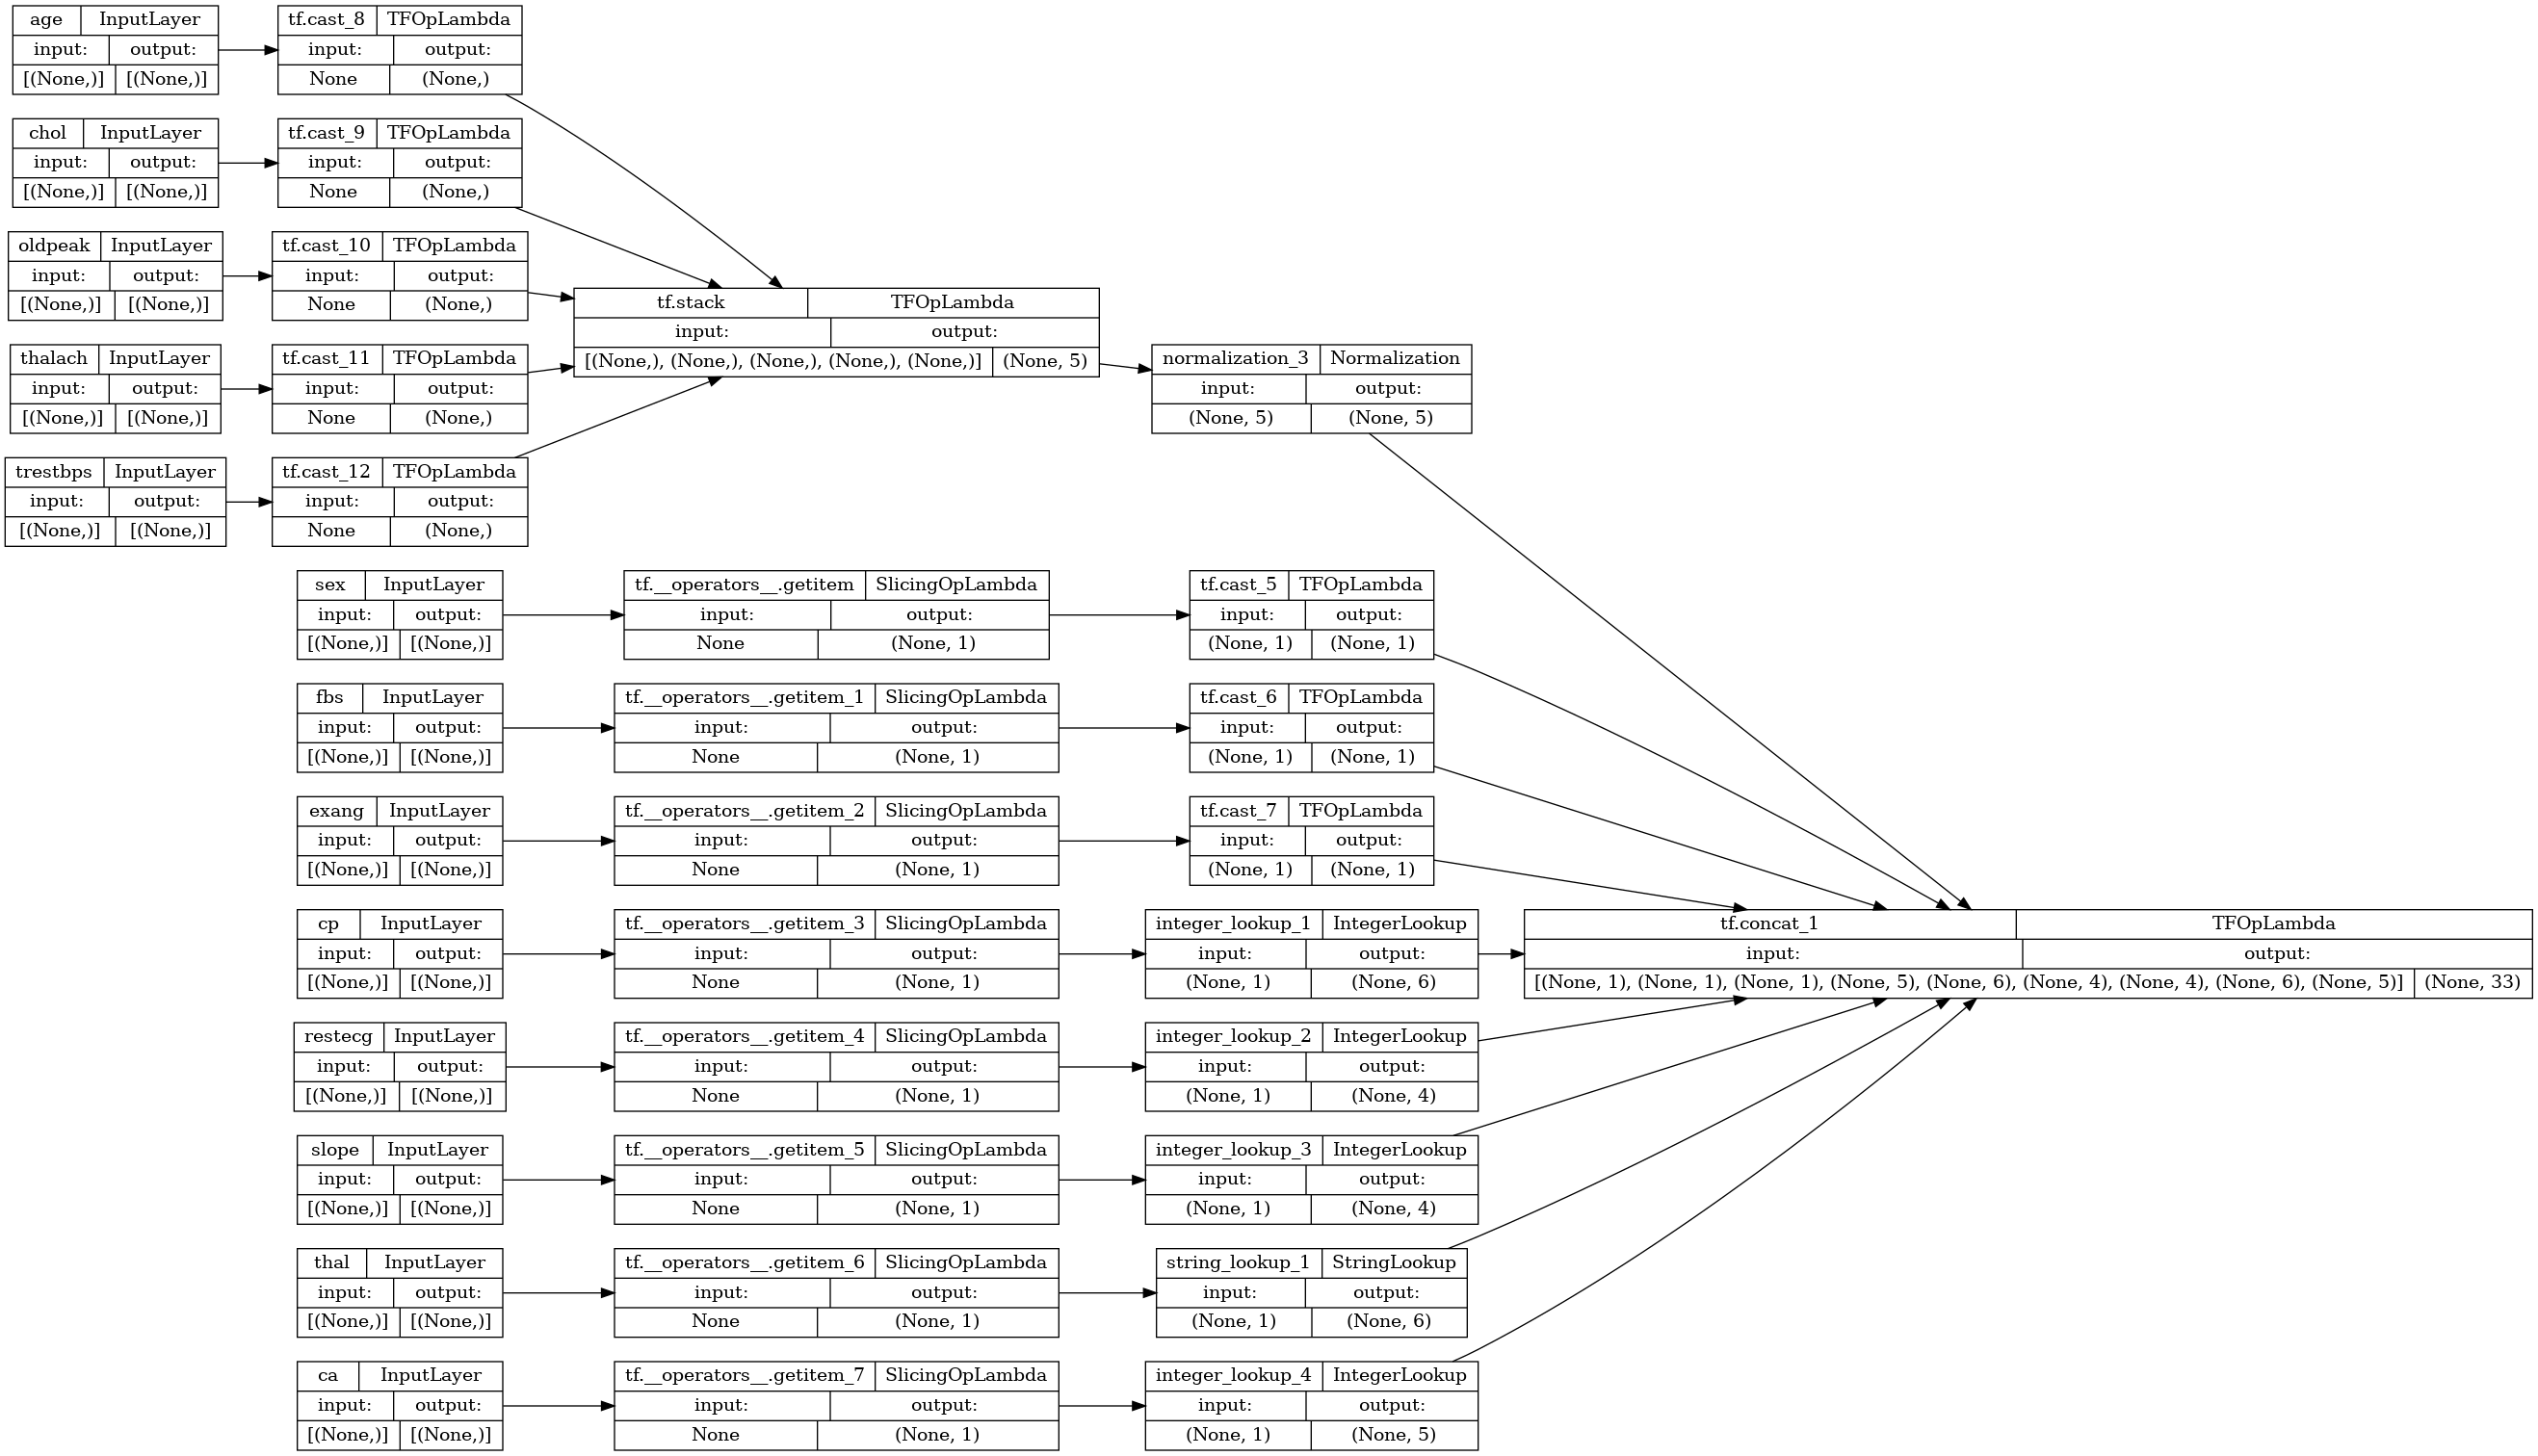

In [41]:
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True)

전처리기를 테스트하려면 <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html" class="external">DataFrame.iloc</a> 접근자를 사용하여 DataFrame에서 첫 번째 예제를 조각화합니다. 그런 다음 이를 사전으로 변환하고 사전을 전처리기에 전달합니다. 결과적으로 얻어지는 것은 이진 특성, 정규화된 숫자 특성 및 원-핫 범주 특성을 순서대로 포함하는 단일 벡터입니다.

In [42]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[ 1.        ,  1.        ,  0.        ,  0.93383914, -0.26008663,
         1.0680453 ,  0.03480718,  0.74578077,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]], dtype=float32)>

### 모델 생성 및 훈련

이제 모델의 본문을 만듭니다. 이전 예와 동일한 구성을 사용합니다. 바로, 몇 개의 `Dense` rectified-linear 레이어와 분류를 위한 `Dense(1)` 출력 레이어입니다.

In [43]:
body = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

이제 Keras functional API를 사용하여 두 조각을 함께 연결합니다.

In [44]:
inputs

{'age': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'age')>,
 'sex': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'sex')>,
 'cp': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'cp')>,
 'trestbps': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'chol')>,
 'fbs': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'fbs')>,
 'restecg': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'restecg')>,
 'thalach': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'thalach')>,
 'exang': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'exang')>,
 'oldpeak': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'oldpeak')>,
 'slope': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'slope')>,
 'ca': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'ca')>,
 'thal': <KerasTensor: shape=(None,) dtype=string 

In [45]:
x = preprocessor(inputs)
x

<KerasTensor: shape=(None, 33) dtype=float32 (created by layer 'model_1')>

In [46]:
result = body(x)
result

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sequential_3')>

In [47]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

이 모델은 입력 사전을 예상합니다. 데이터를 전달하는 가장 간단한 방법은 DataFrame을 dict로 변환하고 해당 dict를 `Model.fit`에 `x` 인수로 전달하는 것입니다.

In [48]:
history = model.fit(dict(df), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5


  1/152 [..............................] - ETA: 3:55 - loss: 0.7060 - accuracy: 0.5000

 12/152 [=>............................] - ETA: 0s - loss: 0.6839 - accuracy: 0.6667  

 23/152 [===>..........................] - ETA: 0s - loss: 0.6487 - accuracy: 0.7174

 35/152 [=====>........................] - ETA: 0s - loss: 0.6341 - accuracy: 0.7857

 46/152 [========>.....................] - ETA: 0s - loss: 0.6324 - accuracy: 0.7609

 58/152 [==========>...................] - ETA: 0s - loss: 0.6213 - accuracy: 0.7672

 70/152 [============>.................] - ETA: 0s - loss: 0.6110 - accuracy: 0.7714

 81/152 [==============>...............] - ETA: 0s - loss: 0.6080 - accuracy: 0.7531

 92/152 [=================>............] - ETA: 0s - loss: 0.6051 - accuracy: 0.7391

103/152 [===================>..........] - ETA: 0s - loss: 0.6071 - accuracy: 0.7282

115/152 [=====================>........] - ETA: 0s - loss: 0.5946 - accuracy: 0.7348

127/152 [========================>.....] - ETA: 0s - loss: 0.5969 - accuracy: 0.7283

139/152 [==========================>...] - ETA: 0s - loss: 0.5959 - accuracy: 0.7230

151/152 [============================>.] - ETA: 0s - loss: 0.5859 - accuracy: 0.7252

152/152 [==============================] - 2s 5ms/step - loss: 0.5852 - accuracy: 0.7261


Epoch 2/5


  1/152 [..............................] - ETA: 0s - loss: 0.4935 - accuracy: 0.5000

 13/152 [=>............................] - ETA: 0s - loss: 0.5104 - accuracy: 0.7308

 25/152 [===>..........................] - ETA: 0s - loss: 0.5463 - accuracy: 0.6600

 37/152 [======>.......................] - ETA: 0s - loss: 0.5099 - accuracy: 0.7162

 49/152 [========>.....................] - ETA: 0s - loss: 0.5047 - accuracy: 0.7347

 61/152 [===========>..................] - ETA: 0s - loss: 0.5015 - accuracy: 0.7377

 73/152 [=============>................] - ETA: 0s - loss: 0.4833 - accuracy: 0.7740

 85/152 [===============>..............] - ETA: 0s - loss: 0.4743 - accuracy: 0.7824

 96/152 [=================>............] - ETA: 0s - loss: 0.4604 - accuracy: 0.7865

108/152 [====================>.........] - ETA: 0s - loss: 0.4600 - accuracy: 0.7824

120/152 [======================>.......] - ETA: 0s - loss: 0.4671 - accuracy: 0.7750

132/152 [=========================>....] - ETA: 0s - loss: 0.4561 - accuracy: 0.7765

144/152 [===========================>..] - ETA: 0s - loss: 0.4622 - accuracy: 0.7639

152/152 [==============================] - 1s 4ms/step - loss: 0.4585 - accuracy: 0.7657


Epoch 3/5


  1/152 [..............................] - ETA: 0s - loss: 0.1753 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.4180 - accuracy: 0.8077

 24/152 [===>..........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.7708

 35/152 [=====>........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.7714

 47/152 [========>.....................] - ETA: 0s - loss: 0.3767 - accuracy: 0.8085

 59/152 [==========>...................] - ETA: 0s - loss: 0.4081 - accuracy: 0.7797

 71/152 [=============>................] - ETA: 0s - loss: 0.4048 - accuracy: 0.7676

 83/152 [===============>..............] - ETA: 0s - loss: 0.4090 - accuracy: 0.7771

 95/152 [=================>............] - ETA: 0s - loss: 0.3995 - accuracy: 0.7895

107/152 [====================>.........] - ETA: 0s - loss: 0.4039 - accuracy: 0.7804

119/152 [======================>.......] - ETA: 0s - loss: 0.3979 - accuracy: 0.7773

131/152 [========================>.....] - ETA: 0s - loss: 0.3853 - accuracy: 0.7863

143/152 [===========================>..] - ETA: 0s - loss: 0.3848 - accuracy: 0.7797

152/152 [==============================] - 1s 5ms/step - loss: 0.3868 - accuracy: 0.7756


Epoch 4/5


  1/152 [..............................] - ETA: 0s - loss: 0.1703 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8077

 25/152 [===>..........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.7800

 37/152 [======>.......................] - ETA: 0s - loss: 0.3219 - accuracy: 0.7838

 49/152 [========>.....................] - ETA: 0s - loss: 0.3530 - accuracy: 0.7959

 61/152 [===========>..................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8033

 73/152 [=============>................] - ETA: 0s - loss: 0.3151 - accuracy: 0.8151

 84/152 [===============>..............] - ETA: 0s - loss: 0.3271 - accuracy: 0.8095

 95/152 [=================>............] - ETA: 0s - loss: 0.3338 - accuracy: 0.8158

107/152 [====================>.........] - ETA: 0s - loss: 0.3310 - accuracy: 0.8178

119/152 [======================>.......] - ETA: 0s - loss: 0.3228 - accuracy: 0.8235

130/152 [========================>.....] - ETA: 0s - loss: 0.3225 - accuracy: 0.8269

141/152 [==========================>...] - ETA: 0s - loss: 0.3377 - accuracy: 0.8191

152/152 [==============================] - ETA: 0s - loss: 0.3471 - accuracy: 0.8119

152/152 [==============================] - 1s 5ms/step - loss: 0.3471 - accuracy: 0.8119


Epoch 5/5


  1/152 [..............................] - ETA: 0s - loss: 0.3056 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8462

 25/152 [===>..........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.8000

 36/152 [======>.......................] - ETA: 0s - loss: 0.3276 - accuracy: 0.8194

 47/152 [========>.....................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8298

 58/152 [==========>...................] - ETA: 0s - loss: 0.2834 - accuracy: 0.8448

 69/152 [============>.................] - ETA: 0s - loss: 0.2994 - accuracy: 0.8333

 80/152 [==============>...............] - ETA: 0s - loss: 0.2850 - accuracy: 0.8375

 91/152 [================>.............] - ETA: 0s - loss: 0.2828 - accuracy: 0.8462

102/152 [===================>..........] - ETA: 0s - loss: 0.2976 - accuracy: 0.8382

114/152 [=====================>........] - ETA: 0s - loss: 0.3012 - accuracy: 0.8289

126/152 [=======================>......] - ETA: 0s - loss: 0.3005 - accuracy: 0.8294

138/152 [==========================>...] - ETA: 0s - loss: 0.3108 - accuracy: 0.8261

150/152 [============================>.] - ETA: 0s - loss: 0.3274 - accuracy: 0.8167

152/152 [==============================] - 1s 5ms/step - loss: 0.3270 - accuracy: 0.8185


`tf.data`를 사용해도 됩니다.

In [49]:
ds = tf.data.Dataset.from_tensor_slices((
    dict(df),
    target
))

ds = ds.batch(BATCH_SIZE)

In [50]:
import pprint

for x, y in ds.take(1):
  pprint.pprint(x)
  print()
  print(y)

{'age': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([63, 67])>,
 'ca': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 3])>,
 'chol': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([233, 286])>,
 'cp': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 4])>,
 'exang': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1])>,
 'fbs': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 0])>,
 'oldpeak': <tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.3, 1.5])>,
 'restecg': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 2])>,
 'sex': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>,
 'slope': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 2])>,
 'thal': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'fixed', b'normal'], dtype=object)>,
 'thalach': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([150, 108])>,
 'trestbps': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([145, 160])>}

tf.Tensor([0 1], shape=(2,), dtype=int64)


In [51]:
history = model.fit(ds, epochs=5)

Epoch 1/5


  1/152 [..............................] - ETA: 1:04 - loss: 0.1742 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8846  

 25/152 [===>..........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8400

 36/152 [======>.......................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8611

 48/152 [========>.....................] - ETA: 0s - loss: 0.2431 - accuracy: 0.8854

 60/152 [==========>...................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8833

 72/152 [=============>................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8611

 84/152 [===============>..............] - ETA: 0s - loss: 0.2789 - accuracy: 0.8631

 96/152 [=================>............] - ETA: 0s - loss: 0.2780 - accuracy: 0.8646

108/152 [====================>.........] - ETA: 0s - loss: 0.2995 - accuracy: 0.8426

120/152 [======================>.......] - ETA: 0s - loss: 0.2971 - accuracy: 0.8500

131/152 [========================>.....] - ETA: 0s - loss: 0.2917 - accuracy: 0.8588

143/152 [===========================>..] - ETA: 0s - loss: 0.3013 - accuracy: 0.8601

152/152 [==============================] - 1s 4ms/step - loss: 0.3107 - accuracy: 0.8548


Epoch 2/5


  1/152 [..............................] - ETA: 0s - loss: 0.1596 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.2418 - accuracy: 0.8846

 24/152 [===>..........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8333

 36/152 [======>.......................] - ETA: 0s - loss: 0.2573 - accuracy: 0.8611

 48/152 [========>.....................] - ETA: 0s - loss: 0.2280 - accuracy: 0.8854

 60/152 [==========>...................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8833

 72/152 [=============>................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8611

 84/152 [===============>..............] - ETA: 0s - loss: 0.2638 - accuracy: 0.8631

 96/152 [=================>............] - ETA: 0s - loss: 0.2641 - accuracy: 0.8646

108/152 [====================>.........] - ETA: 0s - loss: 0.2859 - accuracy: 0.8426

120/152 [======================>.......] - ETA: 0s - loss: 0.2833 - accuracy: 0.8500

132/152 [=========================>....] - ETA: 0s - loss: 0.2760 - accuracy: 0.8598

143/152 [===========================>..] - ETA: 0s - loss: 0.2883 - accuracy: 0.8601

152/152 [==============================] - 1s 4ms/step - loss: 0.2972 - accuracy: 0.8548


Epoch 3/5


  1/152 [..............................] - ETA: 0s - loss: 0.1502 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.2320 - accuracy: 0.8846

 24/152 [===>..........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8542

 35/152 [=====>........................] - ETA: 0s - loss: 0.2538 - accuracy: 0.8714

 46/152 [========>.....................] - ETA: 0s - loss: 0.2229 - accuracy: 0.9022

 57/152 [==========>...................] - ETA: 0s - loss: 0.2475 - accuracy: 0.9035

 69/152 [============>.................] - ETA: 0s - loss: 0.2668 - accuracy: 0.8913

 80/152 [==============>...............] - ETA: 0s - loss: 0.2562 - accuracy: 0.8875

 91/152 [================>.............] - ETA: 0s - loss: 0.2570 - accuracy: 0.8846

103/152 [===================>..........] - ETA: 0s - loss: 0.2740 - accuracy: 0.8689

115/152 [=====================>........] - ETA: 0s - loss: 0.2714 - accuracy: 0.8652

127/152 [========================>.....] - ETA: 0s - loss: 0.2702 - accuracy: 0.8701

139/152 [==========================>...] - ETA: 0s - loss: 0.2833 - accuracy: 0.8669

151/152 [============================>.] - ETA: 0s - loss: 0.2878 - accuracy: 0.8642

152/152 [==============================] - 1s 5ms/step - loss: 0.2870 - accuracy: 0.8647


Epoch 4/5


  1/152 [..............................] - ETA: 0s - loss: 0.1446 - accuracy: 1.0000

 12/152 [=>............................] - ETA: 0s - loss: 0.2339 - accuracy: 0.8333

 24/152 [===>..........................] - ETA: 0s - loss: 0.2785 - accuracy: 0.8333

 36/152 [======>.......................] - ETA: 0s - loss: 0.2424 - accuracy: 0.8611

 48/152 [========>.....................] - ETA: 0s - loss: 0.2134 - accuracy: 0.8958

 60/152 [==========>...................] - ETA: 0s - loss: 0.2367 - accuracy: 0.9000

 72/152 [=============>................] - ETA: 0s - loss: 0.2554 - accuracy: 0.8819

 83/152 [===============>..............] - ETA: 0s - loss: 0.2495 - accuracy: 0.8795

 95/152 [=================>............] - ETA: 0s - loss: 0.2431 - accuracy: 0.8842

107/152 [====================>.........] - ETA: 0s - loss: 0.2706 - accuracy: 0.8551

118/152 [======================>.......] - ETA: 0s - loss: 0.2645 - accuracy: 0.8602

130/152 [========================>.....] - ETA: 0s - loss: 0.2600 - accuracy: 0.8654

142/152 [===========================>..] - ETA: 0s - loss: 0.2725 - accuracy: 0.8662

152/152 [==============================] - 1s 5ms/step - loss: 0.2784 - accuracy: 0.8614


Epoch 5/5


  1/152 [..............................] - ETA: 0s - loss: 0.1432 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.2176 - accuracy: 0.8462

 25/152 [===>..........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8600

 37/152 [======>.......................] - ETA: 0s - loss: 0.2332 - accuracy: 0.8784

 49/152 [========>.....................] - ETA: 0s - loss: 0.2036 - accuracy: 0.9082

 61/152 [===========>..................] - ETA: 0s - loss: 0.2279 - accuracy: 0.9098

 73/152 [=============>................] - ETA: 0s - loss: 0.2458 - accuracy: 0.8904

 85/152 [===============>..............] - ETA: 0s - loss: 0.2372 - accuracy: 0.8882

 97/152 [==================>...........] - ETA: 0s - loss: 0.2502 - accuracy: 0.8763

109/152 [====================>.........] - ETA: 0s - loss: 0.2654 - accuracy: 0.8578

121/152 [======================>.......] - ETA: 0s - loss: 0.2555 - accuracy: 0.8636

133/152 [=========================>....] - ETA: 0s - loss: 0.2570 - accuracy: 0.8684

144/152 [===========================>..] - ETA: 0s - loss: 0.2615 - accuracy: 0.8646

152/152 [==============================] - 1s 4ms/step - loss: 0.2704 - accuracy: 0.8581
